In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/adith/fp20_challenge/Challenge_34_Data Governance_January_2026/Data_Governance_C34_Dataset.xlsx")
df.head()

,Record ID,Business Domain,Source System,Table Name,Field Name,Data Owner,Data Steward,Data Classification,Critical Data Element,Completeness Percent,...,Audit Date,Data Quality Score,Governance Maturity Score,Compliance Risk Score,Audit Findings Count,Open Issues Count,Days Since Last Audit,Business Impact Score,Estimated Fine EUR,Remediation Cost EUR
0,1,Operations,Support,Shipments,Shipment_ID,Ops Director,Data Gov Team,Public,No,100.0,...,2025-07-13,99.2,3,14.2,1,1,176,5,0,1758
1,2,Marketing,Web_Analytics,Campaigns,Campaign_ID,Head of Growth,Marketing Analytics,Internal,No,100.0,...,2025-03-19,100.0,2,31.6,4,3,292,1,56842,5684
2,3,IT,Data_Warehouse,Access_Logs,IP_Address,CISO,Data Gov Team,Sensitive,No,94.9,...,2024-01-13,96.4,4,97.6,10,9,723,7,1115479,245405
3,4,Marketing,Email_Platform,Campaigns,UTM_Campaign,Marketing Lead,CRM Ops,Internal,Yes,85.8,...,2024-03-09,90.5,1,35.3,5,1,667,4,169701,10182
4,5,Finance,Finance_System,Invoices,Payment_Status,Finance Director,Finance Ops,Internal,No,99.2,...,2025-07-22,98.7,4,13.9,1,0,167,3,0,1385


In [3]:
df.shape

(5500, 33)

In [4]:
df.columns

Index(['Record ID', 'Business Domain', 'Source System', 'Table Name',
       'Field Name', 'Data Owner', 'Data Steward', 'Data Classification',
       'Critical Data Element', 'Completeness Percent', 'Accuracy Percent',
       'Consistency Flag', 'Duplicate Flag', 'GDPR Relevant',
       'Regulation Type', 'Retention Policy Years', 'Masking Required',
       'Access Level', 'Compliance Status', 'Audit Rating', 'Country',
       'Country Latitude', 'Country Longitude', 'Audit Date',
       'Data Quality Score', 'Governance Maturity Score',
       'Compliance Risk Score', 'Audit Findings Count', 'Open Issues Count',
       'Days Since Last Audit', 'Business Impact Score', 'Estimated Fine EUR',
       'Remediation Cost EUR'],
      dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Record ID                    0
Business Domain              0
Source System                0
Table Name                   0
Field Name                   0
Data Owner                   0
Data Steward                 0
Data Classification          0
Critical Data Element        0
Completeness Percent         0
Accuracy Percent             0
Consistency Flag             0
Duplicate Flag               0
GDPR Relevant                0
Regulation Type              0
Retention Policy Years       0
Masking Required             0
Access Level                 0
Compliance Status            0
Audit Rating                 0
Country                      0
Country Latitude             0
Country Longitude            0
Audit Date                   0
Data Quality Score           0
Governance Maturity Score    0
Compliance Risk Score        0
Audit Findings Count         0
Open Issues Count            0
Days Since Last Audit        0
Business Impact Score        0
Estimated Fine EUR           0
Remediat

### Bucket 1: Identity & Hierarchy (Structure)

**Purpose:** Used for drill-down, grouping, slicing.

- Business Domain
- Source System
- Table Name
- Field Name
- Country

#### Quick Questions to Ask

1. **Cardinality?**
   - [ ] Low
   - [ ] Medium
   - [ ] High

2. **Natural hierarchy?**
   - [ ] Yes
   - [ ] No

---
**Next Step:** Once answered → stop.

**1.Business domain**

In [7]:
df['Business Domain'].describe()

count          5500
unique            6
top       Marketing
freq            994
Name: Business Domain, dtype: object

In [8]:
df['Business Domain'].value_counts()

Business Domain
Marketing     994
Finance       982
HR            962
Sales         873
Operations    862
IT            827
Name: count, dtype: int64

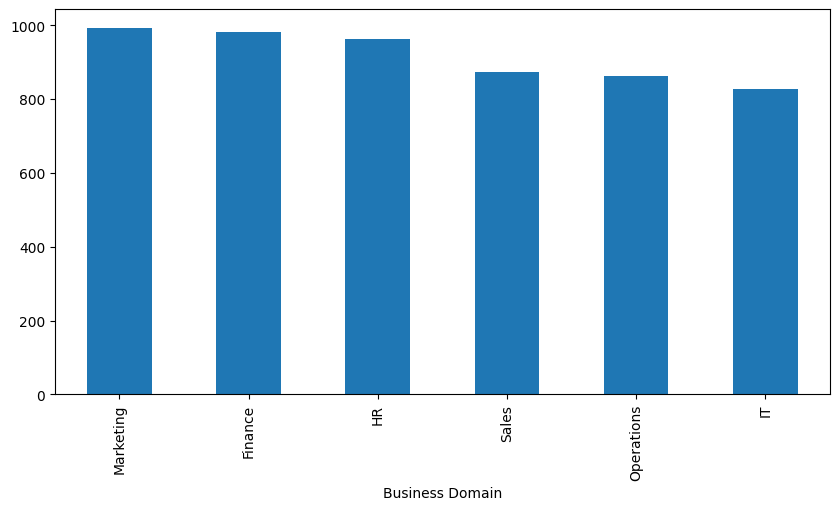

In [5]:
# plot business domain
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df['Business Domain'].value_counts().plot(kind='bar')
plt.show()

Business Domain has 6 categories with fairly even distribution (≈15–18%).
This ensures domain-level risk comparisons are not biased by record volume and makes it suitable as the top drill-down level.

**2. Source System**

In [10]:
df['Source System'].describe()

count               5500
unique                23
top       Data_Warehouse
freq                1130
Name: Source System, dtype: object

In [11]:
df['Source System'].value_counts()

Source System
Data_Warehouse      1130
CRM                  383
Support              330
Finance_System       211
ERP                  209
Recruiting_ATS       208
HR_System            206
Web_Analytics        205
Payments_Gateway     198
Learning_LMS         190
Email_Platform       189
Logistics            187
Billing              186
CDP                  179
POS                  178
Procurement          176
Payroll              174
IAM                  171
Order_Management     167
AI_Platform          166
Security_SIEM        163
Monitoring           156
WMS                  138
Name: count, dtype: int64

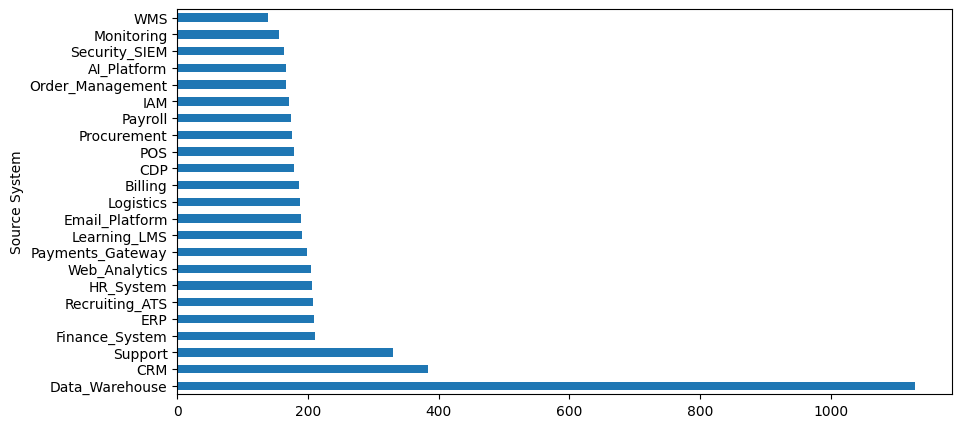

In [14]:
# plot of source system distribution (horizontal bar chart)
plt.figure(figsize=(10,5))
df['Source System'].value_counts().plot(kind='barh')
plt.show()

Source System has 23 unique values with a skewed distribution.
Data_Warehouse is the dominant system (~20% of records), indicating a centralized integration layer.
Suitable as a second-level drill-down dimension under Business Domain.

**3. Table Name**

In [15]:
df['Table Name'].describe()

count         5500
unique          18
top       Sessions
freq           364
Name: Table Name, dtype: object

In [16]:
df['Table Name'].value_counts()

Table Name
Sessions              364
Invoices              341
Employees             337
Customer_Master       336
Payments              329
Recruitment           327
GL_Entries            312
Shipments             298
Payroll               298
Leads                 297
Orders                295
Campaigns             294
Support_Tickets       288
Security_Incidents    286
POS_Transactions      281
Inventory             276
Access_Logs           274
AI_Models             267
Name: count, dtype: int64

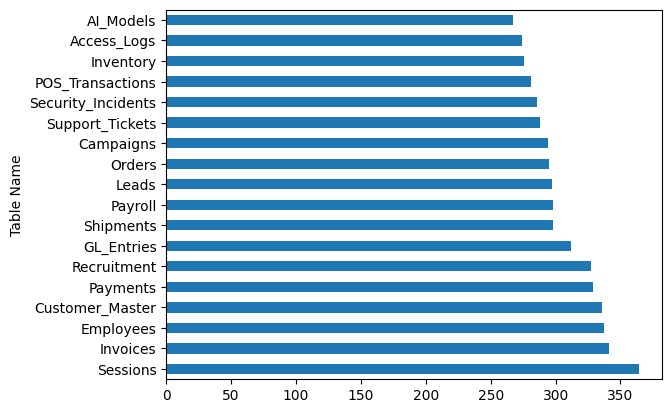

In [17]:
# plot the distribution of table names
df['Table Name'].value_counts().plot(kind='barh')
plt.show()

Table Name represents business entities within source systems.
18 tables with balanced record counts indicate governance risk is entity-driven rather than volume-driven.
Table Name is a critical drill-down level between Source System and Field Name.

**4.Field Name**

In [18]:
df['Field Name'].describe()

count        5500
unique        150
top       Country
freq          252
Name: Field Name, dtype: object

In [19]:
df['Field Name'].value_counts()

Field Name
Country                 252
Customer_ID             237
Phone                   141
Email                   109
IP_Address               90
                       ... 
Bonus_EUR                19
Marketing_OptIn_Date     19
Timestamp                18
Owner_Team               16
Refund_Flag              13
Name: count, Length: 150, dtype: int64

Field Name represents individual data elements and is the lowest governance grain.
150 unique fields with repeated sensitive attributes (e.g., Country, Email, Phone) indicate cross-system definition drift and concentrated compliance risk.
Field level is the correct unit for risk prioritization and remediation decisions.

**5. Country**

In [20]:
df['Country'].describe()

count      5500
unique       12
top       Italy
freq        487
Name: Country, dtype: object

In [21]:
df['Country'].value_counts()

Country
Italy             487
Portugal          476
France            475
Netherlands       465
Denmark           460
Germany           458
Sweden            455
Belgium           454
Ireland           452
Poland            451
Spain             448
United Kingdom    419
Name: count, dtype: int64

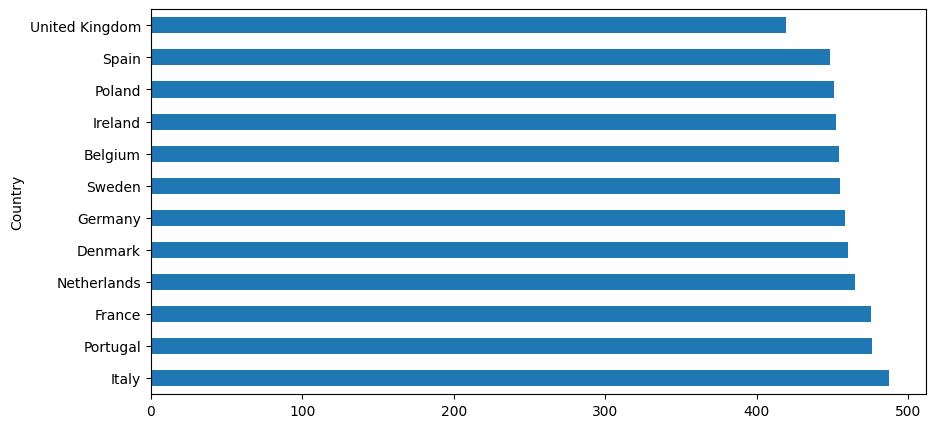

In [26]:
# plot a bar chart of country distribution
plt.figure(figsize=(10,5))
df['Country'].value_counts().plot(kind='barh')
plt.show()


### Bucket 2 - Governance Control (Ownership and policy)

**6. Data Owner**

In [27]:
df['Data Owner'].describe()

count               5500
unique                18
top       Marketing Lead
freq                 351
Name: Data Owner, dtype: object

In [28]:
df['Data Owner'].value_counts()

Data Owner
Marketing Lead           351
Head of Finance Ops      335
HR Manager               332
Controller               331
Head of Growth           326
People Ops Lead          320
Digital Lead             317
Finance Director         316
Head of Operations       315
HR Director              310
Sales Director           308
Head of Data Platform    300
Head of Revenue Ops      286
CIO                      281
Regional Sales Lead      279
Supply Chain Lead        278
Ops Director             269
CISO                     246
Name: count, dtype: int64

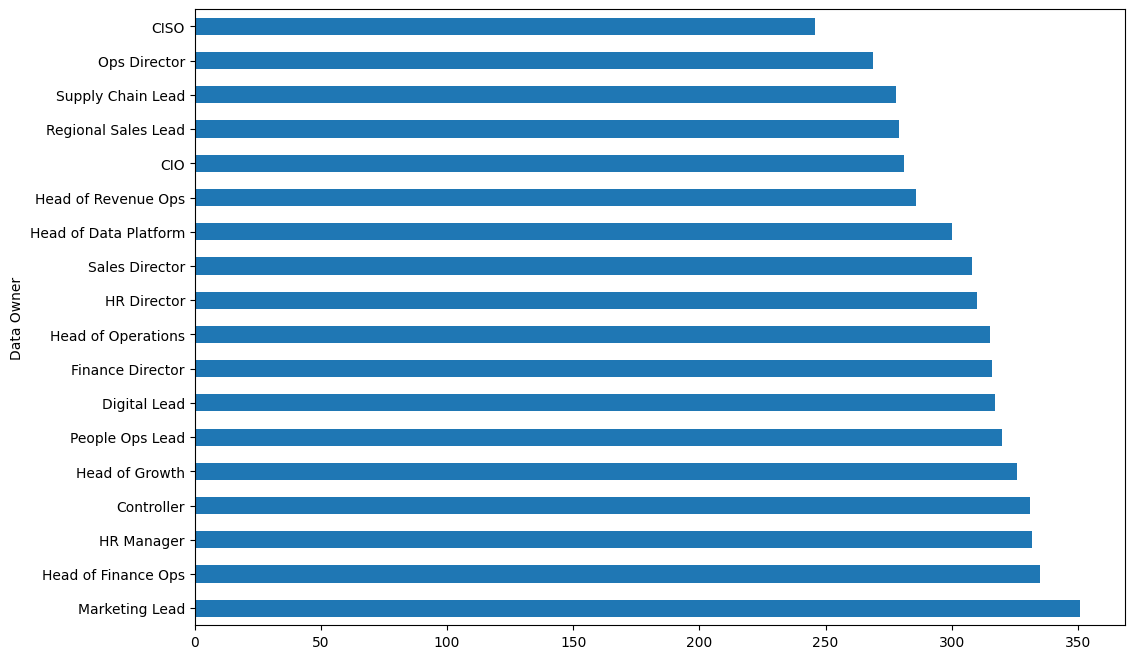

In [29]:
# plot the value counts of data owner
plt.figure(figsize=(12,8))
df['Data Owner'].value_counts().plot(kind='barh')
plt.show()

Data Owner identifies the accountable business role for each data asset.
Ownership coverage is complete and evenly distributed, enabling clear escalation and remediation actions for high-risk data.

**7. Data Steward**

Data Steward identifies the accountable business role for each data asset.
Ownership coverage is complete and evenly distributed, enabling clear escalation and remediation actions for high-risk data.

In [30]:
df['Data Steward'].describe()

count              5500
unique               13
top       Data Gov Team
freq               1836
Name: Data Steward, dtype: object

In [31]:
df['Data Steward'].value_counts()

Data Steward
Data Gov Team           1836
CRM Ops                  341
FP&A Analytics           331
Finance Ops              328
Marketing Analytics      323
HR Analytics             314
Sales Analytics          311
People Ops               306
Platform Engineering     290
Process Excellence       286
Security Ops             282
Revenue Ops              278
Ops BI                   274
Name: count, dtype: int64

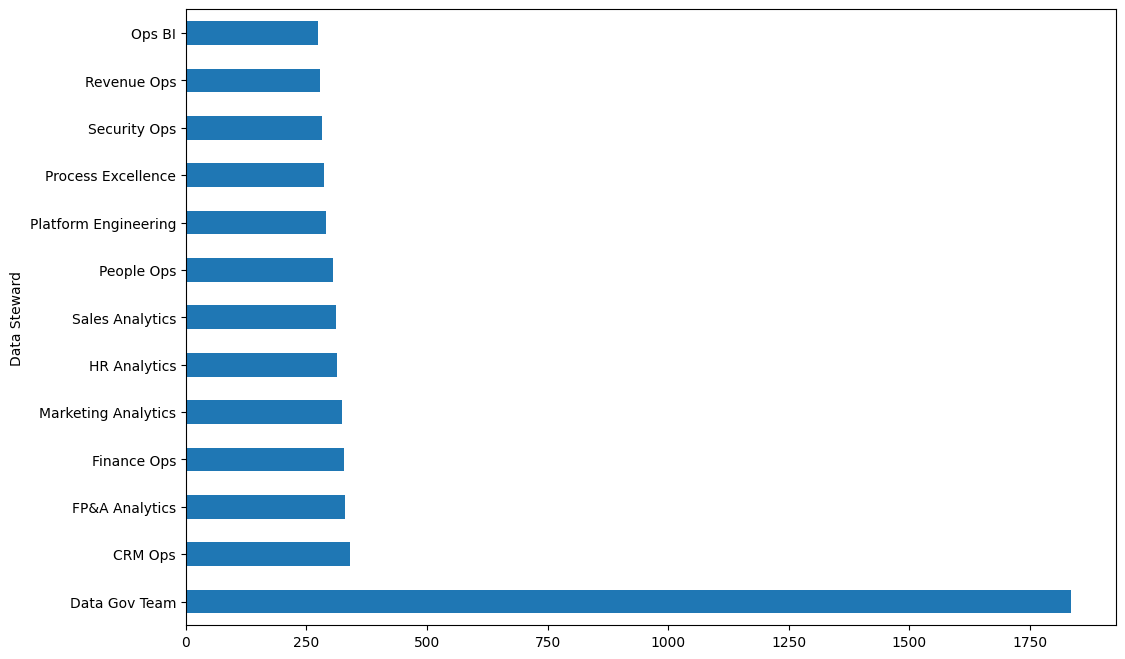

In [32]:
# plot data steward using a horizontal bar chart
plt.figure(figsize=(12,8))
df['Data Steward'].value_counts().plot(kind='barh')
plt.show()

Data Steward represents the team responsible for operational data governance activities.
A dominant central Data Gov Team alongside domain analytics teams indicates a hybrid stewardship model, suggesting relatively mature governance execution.

**8. Critical Data Element (CDE)**

In [33]:
df['Critical Data Element'].describe()

count     5500
unique       2
top         No
freq      3954
Name: Critical Data Element, dtype: object

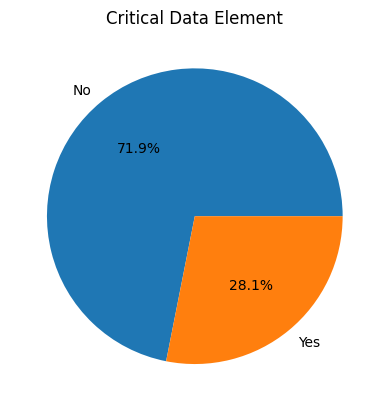

In [34]:
## Plot a pie chart for Critical Data Element
plt.pie(df['Critical Data Element'].value_counts(), labels=df['Critical Data Element'].unique(), autopct='%1.1f%%')
plt.title('Critical Data Element')
plt.show()

Critical Data Element is a boolean flag indicating data assets that are essential for business operations, reporting, or compliance.
The majority of fields are non-critical, which supports focused governance prioritization.
CDE should be used as a prioritization filter rather than an analytical dimension.

**9. Access Level**

In [35]:
df['Access Level'].describe()

count     5500
unique       3
top       Read
freq      3015
Name: Access Level, dtype: object

In [36]:
df['Access Level'].value_counts()

Access Level
Read     3015
Write    1746
Admin     739
Name: count, dtype: int64

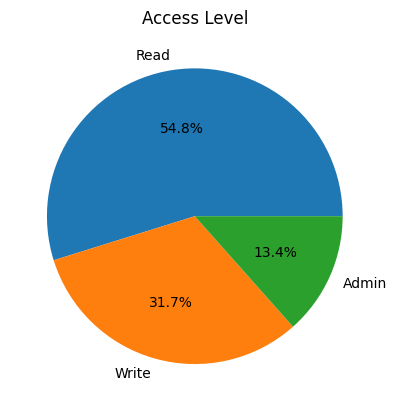

In [37]:
# plot access level (pie chart)
plt.pie(df['Access Level'].value_counts(), labels=df['Access Level'].unique(), autopct='%1.1f%%')
plt.title('Access Level')
plt.show()

Access Level defines the degree of interaction permitted with data assets.
While the overall distribution appears appropriate, access level becomes a critical risk factor when combined with sensitive, critical, or non-compliant data.

**Masking required**

In [38]:
df['Masking Required'].describe()

count     5500
unique       2
top         No
freq      3836
Name: Masking Required, dtype: object

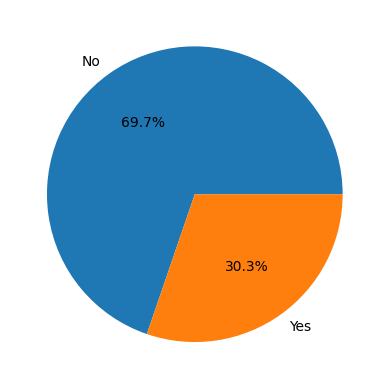

In [40]:
#plot the pie chart for masking required
plt.pie(df['Masking Required'].value_counts(), labels=df['Masking Required'].value_counts().index, autopct='%1.1f%%')
plt.show()

Masking Required indicates whether a data asset is expected to be protected through masking or anonymization based on governance policy.
It represents a control expectation and becomes meaningful when combined with access level, sensitivity, and compliance status.

**Retention policy**

In [42]:
df['Retention Policy Years'].describe()

count    5500.000000
mean        4.291455
std         2.540875
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        10.000000
Name: Retention Policy Years, dtype: float64

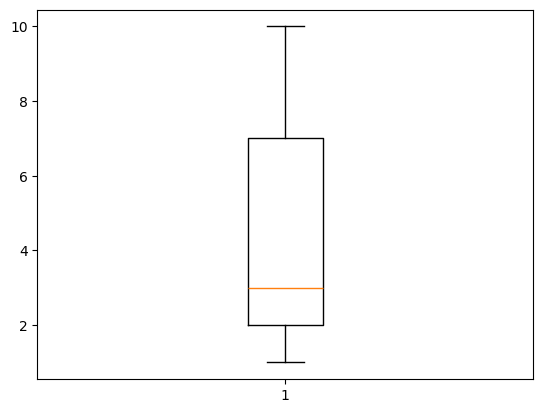

In [46]:
#plot the retention policy years box plot
plt.boxplot(df['Retention Policy Years'])
plt.show()

Retention Policy Years defines the permitted lifespan of data assets.
It is a policy constraint rather than a risk indicator and becomes meaningful when combined with audit freshness, sensitivity, and compliance status.

### Bucket 3: Quality metrics and risk scores

**Completeness Percentage**

In [3]:
df['Completeness Percent'].describe()

count    5500.000000
mean       93.911600
std         5.978819
min        64.400000
25%        90.000000
50%        95.200000
75%       100.000000
max       100.000000
Name: Completeness Percent, dtype: float64

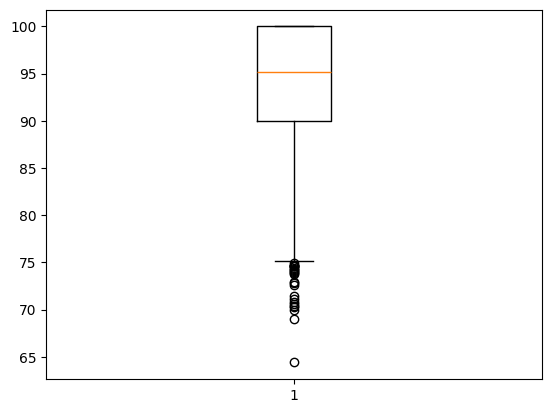

In [6]:
# plot the completeness percentage box plot
plt.boxplot(df['Completeness Percent'])
plt.show()

Completeness Percent measures the presence of expected values.
While most fields show high completeness, a small subset exhibits significant gaps, which can materially impact downstream quality and compliance.
Completeness should be used as a diagnostic indicator rather than a standalone performance metric.

**Accuracy Percent**

In [7]:
df['Accuracy Percent'].describe()

count    5500.000000
mean       92.781873
std         6.781369
min        64.200000
25%        88.100000
50%        94.000000
75%        99.700000
max       100.000000
Name: Accuracy Percent, dtype: float64

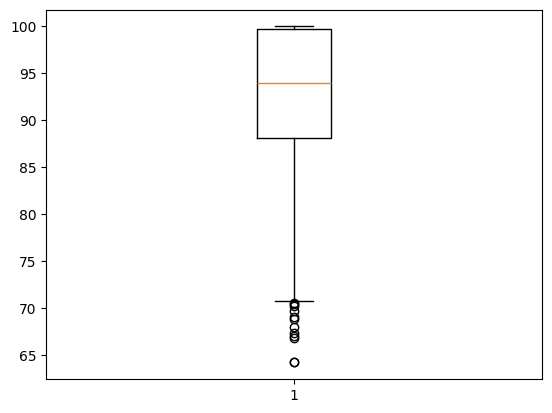

In [8]:
# plot the accuracy percentage box plot
plt.boxplot(df['Accuracy Percent'])
plt.show()

Accuracy Percent measures the correctness of data values.
While overall accuracy is high, a subset of fields exhibits severe inaccuracies, posing higher risk than missing data due to silent failure in decision-making.
Accuracy should be used as a threshold-based diagnostic indicator.

**Consistency Flag**

In [9]:
df['Consistency Flag'].describe()

count     5500
unique       2
top        Yes
freq      4876
Name: Consistency Flag, dtype: object

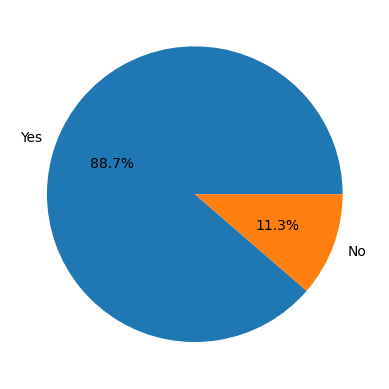

In [11]:
# plot consistency flag pie chart with percentages
plt.pie(df['Consistency Flag'].value_counts(), labels=df['Consistency Flag'].value_counts().index, autopct='%1.1f%%')
plt.show()

Consistency Flag indicates whether data values adhere to expected standards across records and systems.
While most fields are consistent, a non-trivial subset exhibits inconsistency, which can undermine cross-system reporting and compliance.

**Duplicate Flag**

In [12]:
df['Duplicate Flag'].describe()

count     5500
unique       2
top         No
freq      5179
Name: Duplicate Flag, dtype: object

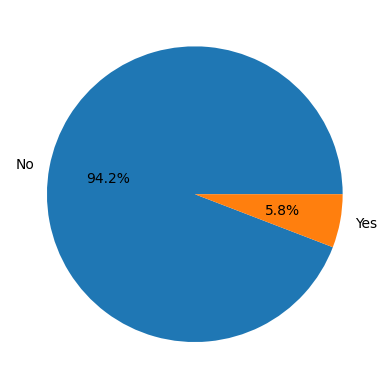

In [13]:
# plot duplicate flag pie chart with percentages
plt.pie(df['Duplicate Flag'].value_counts(), labels=df['Duplicate Flag'].value_counts().index, autopct='%1.1f%%')
plt.show()

Duplicate Flag indicates whether a field contains duplicate values where uniqueness is expected.
Although duplicates occur in a minority of fields, their impact can be severe, particularly for identifiers and financially critical data.

### Bucket 4: Scores (Decision Drivers)

**Data Quality score**

In [14]:
df['Data Quality Score'].describe()

count    5500.000000
mean       93.671364
std         4.868792
min        74.300000
25%        90.600000
50%        94.400000
75%        97.500000
max       100.000000
Name: Data Quality Score, dtype: float64

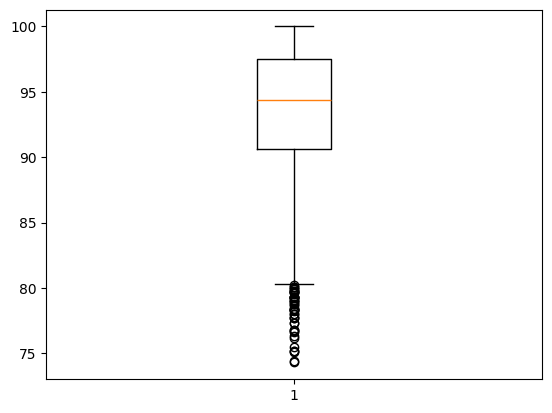

In [15]:
# plot data quality score using box plot
plt.boxplot(df['Data Quality Score'])
plt.show()


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\2056115492.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Data Quality Score'])


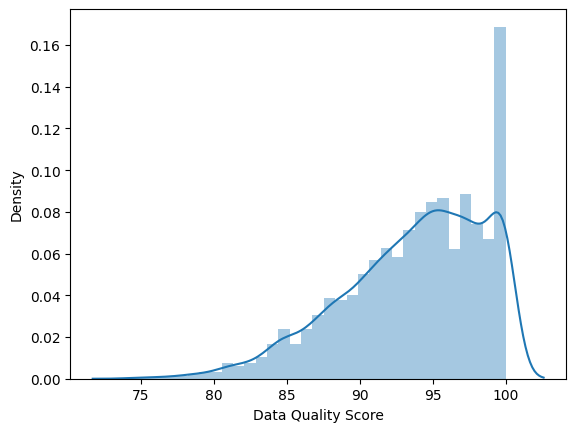

In [16]:
#plot the distribution shape with seaborn
import seaborn as sns
sns.distplot(df['Data Quality Score'])
plt.show()

the distribution of this is left skewed which means few bad fields.

In [17]:
# identify outliers in data quality score
Q1 = df['Data Quality Score'].quantile(0.25)
Q3 = df['Data Quality Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Data Quality Score'] < lower_bound) | (df['Data Quality Score'] > upper_bound)]
print("Outliers in Data Quality Score:")
print(outliers)

Outliers in Data Quality Score:
      Record ID Business Domain     Source System          Table Name  \
273         274              HR      Learning_LMS             Payroll   
322         323              HR    Recruiting_ATS           Employees   
400         401              IT     Security_SIEM           AI_Models   
547         548              HR    Recruiting_ATS           Employees   
688         689       Marketing     Web_Analytics            Sessions   
864         865       Marketing               CDP           Campaigns   
894         895       Marketing     Web_Analytics            Sessions   
896         897       Marketing     Web_Analytics            Sessions   
964         965              IT     Security_SIEM  Security_Incidents   
985         986              IT               IAM           AI_Models   
1024       1025              HR    Recruiting_ATS         Recruitment   
1199       1200       Marketing    Email_Platform           Campaigns   
1311       1312    

Data Quality Score shows a left-skewed distribution with most fields scoring high, but a small subset exhibiting critically low quality.
These low-scoring fields consistently align with high compliance risk, audit findings, and financial exposure, making them priority targets for governance action.

**Goverance Maturity Score**

In [ ]:
df['Governance Maturity Score'].describe()
## the maturity score ranges from 1-5 with 1 being low maturity and 5 being high maturity 

count    5500.000000
mean        3.336364
std         1.009117
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Governance Maturity Score, dtype: float64

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\3705362682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Governance Maturity Score'])


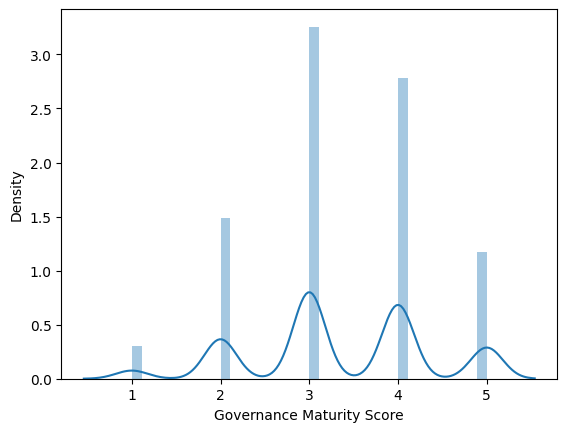

In [22]:
# plot the distribution of governance maturity score using seaborn
import seaborn as sns
sns.distplot(df['Governance Maturity Score'])
plt.show()

#### Indentifying Governance Maturity Outliers

Key Rule:

**Governance maturity is ordinal so do not use IQR/ z-score logic.**

In [23]:
# Inspect the available maturity levels

df['Governance Maturity Score'].value_counts().sort_index()

Governance Maturity Score
1     187
2     908
3    1990
4    1698
5     717
Name: count, dtype: int64

In [24]:
# Define maturity bands 

def maturity_band(score):
    if score == 1:
        return "Low (Unmanged)"
    elif score == 2:
        return "Medium (At Risk)"
    else:
        return "High (Managed)"

In [25]:
df['Maturity Band'] = df['Governance Maturity Score'].apply(maturity_band)

In [26]:
# Flag governance outliers
df['Low Governance Maturity Flag'] = df['Governance Maturity Score'] <= 2


In [27]:
df['Low Governance Maturity Flag'].value_counts(normalize=True) * 100


Low Governance Maturity Flag
False    80.090909
True     19.909091
Name: proportion, dtype: float64

In [28]:
gov_outliers = df[df['Low Governance Maturity Flag']]


In [29]:
df['Low Data Quality Flag'] = df['Data Quality Score'] < 90


In [30]:
def governance_quality_quadrant(row):
    if row['Low Governance Maturity Flag'] and row['Low Data Quality Flag']:
        return "Critical (Low Quality + Low Maturity)"
    elif row['Low Governance Maturity Flag']:
        return "Fragile (High Quality + Low Maturity)"
    elif row['Low Data Quality Flag']:
        return "Fixable (Low Quality + High Maturity)"
    else:
        return "Healthy"


In [31]:
df['Governance-Quality Quadrant'] = df.apply(governance_quality_quadrant, axis=1)


In [33]:
df['Quality Band'] = df['Data Quality Score'].apply(
    lambda x: 'Low Quality' if x < 90 else 'High Quality'
)



In [34]:
df['Maturity Band'] = df['Governance Maturity Score'].apply(
    lambda x: 'Low Maturity' if x <= 2 else 'High Maturity'
)


In [35]:
heatmap_df = (
    df.groupby(['Quality Band', 'Maturity Band'])
      .size()
      .reset_index(name='Asset Count')
)


In [36]:
heatmap_pivot = heatmap_df.pivot(
    index='Quality Band',
    columns='Maturity Band',
    values='Asset Count'
)


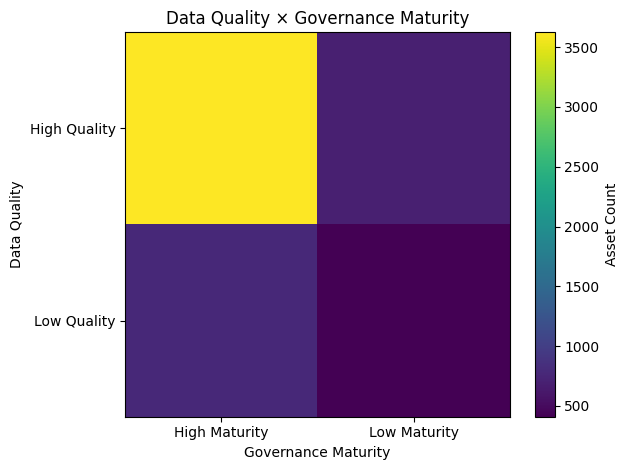

In [ ]:
# plot the heatmap percentages

plt.figure()
plt.imshow(heatmap_pivot.values)

plt.xticks(
    range(len(heatmap_pivot.columns)),
    heatmap_pivot.columns
)
plt.yticks(
    range(len(heatmap_pivot.index)),
    heatmap_pivot.index
)

plt.colorbar(label='Asset Count')
plt.title('Data Quality × Governance Maturity')
plt.xlabel('Governance Maturity')
plt.ylabel('Data Quality')

plt.tight_layout()
plt.show()
                                


### Governance Maturity Score — EDA Summary

#### What the Metric Represents

Governance Maturity Score measures how well-defined, enforced, and repeatable governance processes are for a data asset. Unlike Data Quality Score, it reflects organizational capability, not current data condition.

#### Distribution Summary

- **Range:** 1 to 5
- **Median:** 3
- **Mean:** ~3.34
- **IQR:** 3 to 4

Most data assets sit at moderate to high maturity, indicating that governance processes are generally defined and monitored.

#### Maturity Level Breakdown

- **Level 1 (Unmanaged):** 187
- **Level 2 (At Risk):** 908
- **Level 3 (Managed):** 1,990
- **Level 4 (Well Managed):** 1,698
- **Level 5 (Optimized):** 717

Approximately 19.9% of data assets fall into low governance maturity (≤2) and are flagged as governance outliers.

#### Key Insight

Governance maturity is not uniformly high. While the majority of assets are managed or well managed, a non-trivial subset (~20%) operates under weak or ad-hoc governance, creating structural risk.

#### Relationship with Data Quality

The Quality × Maturity heatmap shows:

- A strong concentration of assets in High Quality + High Maturity (healthy baseline)
- A visible Low Quality + Low Maturity quadrant, indicating true governance failure
- A High Quality + Low Maturity quadrant, signaling fragile or accidental success

This validates that governance maturity meaningfully differentiates sustainable quality from short-term quality.

**Compliance Risk Score**

Compliance risk is the potential for an organization to suffer legal penalties, financial forfeiture, material loss or reputational damage due to failure to comply with laws, regulations, industry standards, or internal policies.

Represents the exposure to negative consequences resulting from non-adherence to rules often referred to as integrity risk.


In [39]:
df['Compliance Risk Score'].describe()

count    5500.000000
mean       45.947891
std        24.770972
min         0.000000
25%        26.800000
50%        38.900000
75%        62.825000
max       100.000000
Name: Compliance Risk Score, dtype: float64

In [40]:
df['Compliance Risk Score'].value_counts().sort_index()

Compliance Risk Score
0.0        5
1.6        2
1.7        1
1.9        1
2.3        1
        ... 
99.6       4
99.7       3
99.8       3
99.9       2
100.0    162
Name: count, Length: 935, dtype: int64

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\786348350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Compliance Risk Score'])


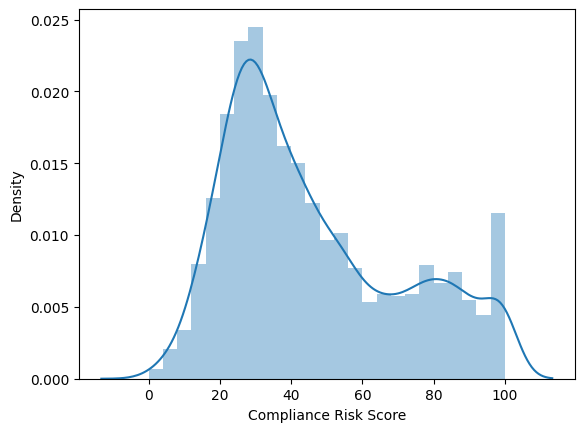

In [45]:
# plot the distribution of compliance risk scores with bar chart and line
sns.distplot(df['Compliance Risk Score'])
plt.show()



In [52]:
# identify the outliers
threshold = df['Compliance Risk Score'].quantile(0.75)
high_risk = df[df['Compliance Risk Score'] >= threshold]
threshold



np.float64(62.824999999999996)

In [53]:
df['Compliance Risk Score'].quantile([0.75, 0.85, 0.9, 0.95])


0.75    62.825
0.85    79.000
0.90    85.900
0.95    95.005
Name: Compliance Risk Score, dtype: float64

In [54]:
def compliance_risk_band(score):
    if score > 85:
        return "Critical Risk"
    elif score > 65:
        return "High Risk"
    elif score > 40:
        return "Medium Risk"
    else:
        return "Low Risk"

df['Compliance Risk Band'] = df['Compliance Risk Score'].apply(compliance_risk_band)


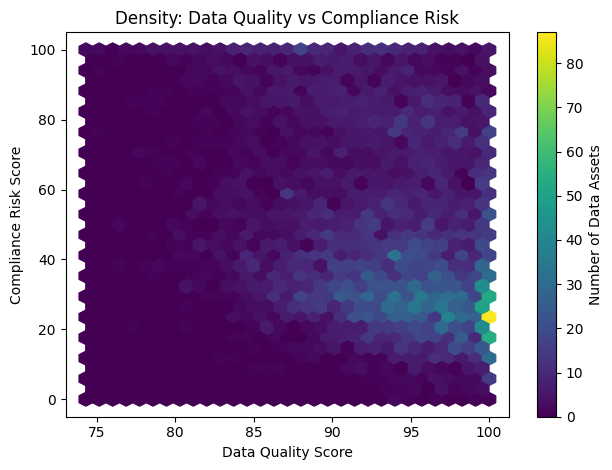

In [59]:
plt.figure()
plt.hexbin(
    df['Data Quality Score'],
    df['Compliance Risk Score'],
    gridsize=30   # controls resolution
)

plt.colorbar(label="Number of Data Assets")
plt.xlabel("Data Quality Score")
plt.ylabel("Compliance Risk Score")
plt.title("Density: Data Quality vs Compliance Risk")

plt.tight_layout()
plt.show()


In [61]:
df.groupby('Maturity Band')['Compliance Risk Score'].describe()


,count,mean,std,min,25%,50%,75%,max
Maturity Band,,,,,,,,
High Maturity,4405.0,44.722361,24.885499,0.0,25.4,37.4,61.7,100.0
Low Maturity,1095.0,50.877991,23.683173,11.5,32.1,42.9,66.4,100.0


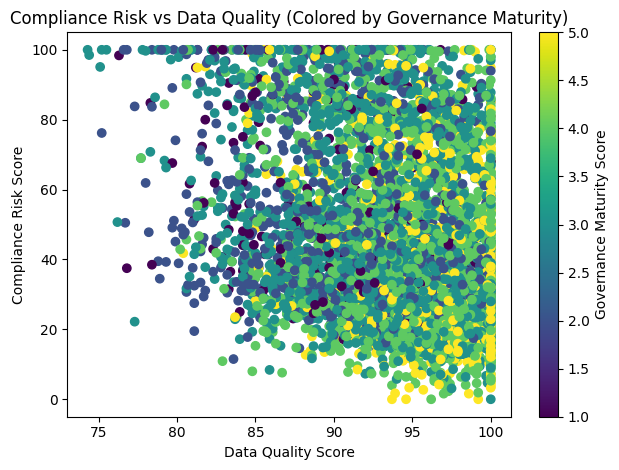

In [65]:
import matplotlib.pyplot as plt

plt.figure()
scatter = plt.scatter(
    df['Data Quality Score'],
    df['Compliance Risk Score'],
    c=df['Governance Maturity Score']
)

plt.xlabel("Data Quality Score")
plt.ylabel("Compliance Risk Score")
plt.title("Compliance Risk vs Data Quality (Colored by Governance Maturity)")

plt.colorbar(scatter, label="Governance Maturity Score")
plt.tight_layout()
plt.show()


In [66]:
grouped_bar = (
    df.groupby(['Governance Maturity Score', 'Quality Band'])['Compliance Risk Score']
      .mean()
      .reset_index()
)


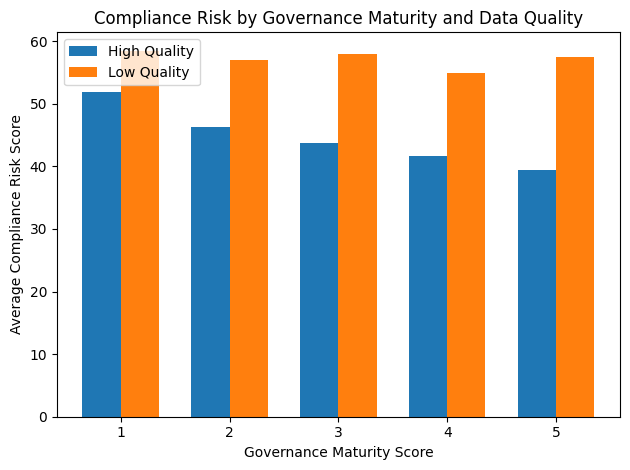

In [68]:
import numpy as np

grouped_bar = (
    df.groupby(['Governance Maturity Score', 'Quality Band'])['Compliance Risk Score']
      .mean()
      .reset_index()
)

x = np.arange(grouped_bar['Governance Maturity Score'].nunique())
width = 0.35

high_q = grouped_bar[grouped_bar['Quality Band'] == 'High Quality']
low_q  = grouped_bar[grouped_bar['Quality Band'] == 'Low Quality']

plt.figure()
plt.bar(x - width/2, high_q['Compliance Risk Score'], width, label='High Quality')
plt.bar(x + width/2, low_q['Compliance Risk Score'], width, label='Low Quality')

plt.xticks(x, high_q['Governance Maturity Score'])
plt.xlabel("Governance Maturity Score")
plt.ylabel("Average Compliance Risk Score")
plt.title("Compliance Risk by Governance Maturity and Data Quality")
plt.legend()

plt.tight_layout()
plt.show()



### Compliance Risk Score — Exploratory Analysis

#### Objective

To understand the distribution, severity, and drivers of Compliance Risk Score across enterprise data assets and evaluate how it interacts with data quality and governance maturity.

#### Variable Overview

- **Feature:** `Compliance Risk Score`
- **Type:** Continuous (0–100)
- **Meaning:** Composite risk indicator reflecting regulatory exposure, audit findings, and compliance gaps for a given data asset.

#### Descriptive Statistics

| Metric | Value |
|--------|-------|
| Count | 5,500 |
| Mean | 45.95 |
| Std Dev | 24.77 |
| Min | 0.0 |
| 25th Percentile | 26.8 |
| Median (50th) | 38.9 |
| 75th Percentile | 62.8 |
| Max | 100.0 |

#### Key Observations

- Wide spread with a strong right tail
- Median below mean → right-skewed distribution
- Significant concentration at very high risk (score = 100)

#### Distribution Analysis

- Compliance risk is not uniformly distributed
- Majority of assets fall in low-to-moderate risk bands
- A non-trivial subset lies in high (≥75) and critical (≥90) risk zones

This indicates that extreme compliance risk is real and present, not an edge case.

#### Relationship with Data Quality

Density and scatter analysis show:
- Higher data quality is generally associated with lower compliance risk density
- However, high-risk assets still exist even at high data quality levels

**Conclusion:** Data quality helps reduce compliance risk but does not eliminate it.

#### Relationship with Governance Maturity

Governance maturity shows a moderating effect:
- Higher maturity → lower average compliance risk
- Reduction is gradual, not dramatic

**Conclusion:** Governance maturity dampens compliance risk but does not override structural or regulatory constraints.

#### Multivariate Interaction (EDA)

**Using:**
- X-axis: Data Quality Score
- Y-axis: Compliance Risk Score
- Color: Governance Maturity Score

**Findings:**
- Low-maturity assets are more densely concentrated in higher risk regions
- High-maturity assets still appear across the risk spectrum

#### Key Takeaway

Compliance risk is:
- Multifactorial
- Influenced by data quality and governance maturity
- Characterized by tail risk, which averages alone fail to capture

This justifies using risk bands and thresholds in dashboards rather than relying solely on mean values.

**Business Impact Score**

In [69]:
df['Business Impact Score'].describe()

count    5500.000000
mean        4.946364
std         2.110047
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: Business Impact Score, dtype: float64

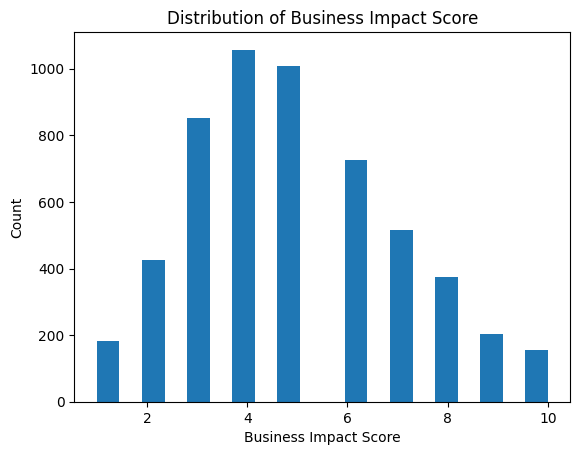

In [74]:
#plot distribution
plt.hist(df['Business Impact Score'], bins=20)
plt.xlabel('Business Impact Score')
plt.ylabel('Count')
plt.title('Distribution of Business Impact Score')
plt.show()

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\3237516540.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Business Impact Score'])


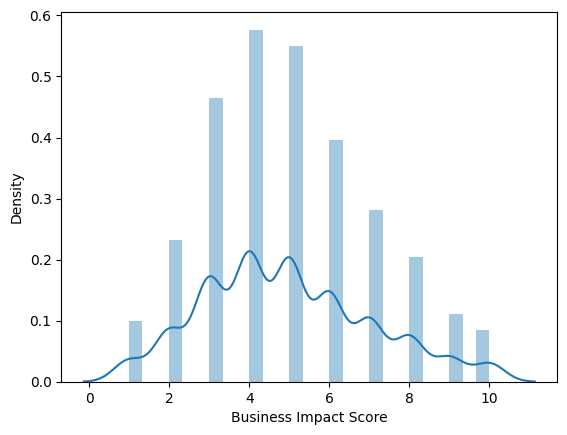

In [76]:
# plot a distplot for Business Impact Score
sns.distplot(df['Business Impact Score'])
plt.show()

In [77]:
df['Business Impact Score'].value_counts().sort_index()

Business Impact Score
1      182
2      425
3      853
4     1057
5     1008
6      726
7      515
8      376
9      203
10     155
Name: count, dtype: int64

In [78]:
# Define Impact Bands
def Impact_band(x):
    if x >= 8:
        return 'High Impact'
    elif x >= 4:
        return 'Medium Impact'
    else:
        return 'Low Impact'
df['Impact band'] = df['Business Impact Score'].apply(Impact_band)

In [80]:
df['Impact band'].value_counts(normalize=True) * 100


Impact band
Medium Impact    60.109091
Low Impact       26.545455
High Impact      13.345455
Name: proportion, dtype: float64

**Plotting the risk-impact matrix**

In [83]:
risk_impact_matrix = (
    df.groupby(['Compliance Risk Band', 'Impact band'])
      .size()
      .unstack()
)

risk_impact_matrix
risk_impact_pct = (
    risk_impact_matrix.div(risk_impact_matrix.sum(axis=1), axis=0) * 100
)

risk_impact_pct


Impact band,High Impact,Low Impact,Medium Impact
Compliance Risk Band,,,
Critical Risk,62.798635,2.047782,35.153584
High Risk,33.473389,7.282913,59.243697
Low Risk,2.385128,36.864258,60.750614
Medium Risk,4.373610,25.574500,70.051890


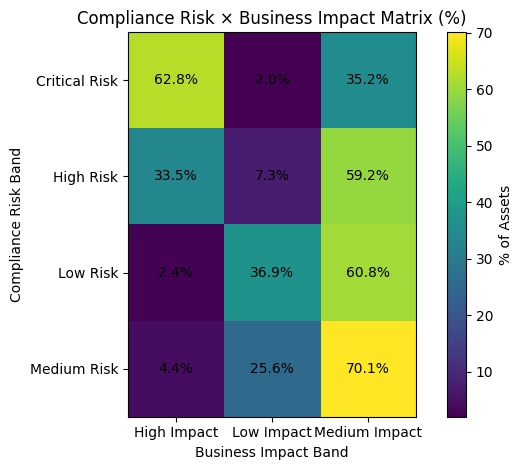

In [84]:
plt.figure()
plt.imshow(risk_impact_pct.values)

plt.xticks(
    range(len(risk_impact_pct.columns)),
    risk_impact_pct.columns
)
plt.yticks(
    range(len(risk_impact_pct.index)),
    risk_impact_pct.index
)

plt.colorbar(label="% of Assets")
plt.title("Compliance Risk × Business Impact Matrix (%)")
plt.xlabel("Business Impact Band")
plt.ylabel("Compliance Risk Band")

# Annotate values
for i in range(len(risk_impact_pct.index)):
    for j in range(len(risk_impact_pct.columns)):
        plt.text(
            j, i,
            f"{risk_impact_pct.values[i, j]:.1f}%",
            ha="center", va="center"
        )

plt.tight_layout()
plt.show()


### Business Impact Score & Risk–Impact Analysis

#### Objective

To evaluate the severity of potential business damage associated with enterprise data assets and to identify where compliance risk coincides with high business impact, enabling prioritization of governance actions.

#### Business Impact Score — Feature Overview

- **Feature:** `Business Impact Score`
- **Type:** Ordinal (1–10)
- **Meaning:** Represents the potential operational, financial, and reputational impact to the business if a data asset is compromised, inaccurate, unavailable, or misused.
- **Interpretation:** Higher values indicate greater severity of business disruption.

#### Descriptive Statistics

| Metric | Value |
|--------|-------|
| Count | 5,500 |
| Mean | 4.95 |
| Std Dev | 2.11 |
| Min | 1 |
| 25th Percentile | 3 |
| Median (50th) | 5 |
| 75th Percentile | 6 |
| Max | 10 |

##### Observations

- Distribution centered around medium impact values (4–6)
- High-impact assets (8–10) exist but form a smaller subset
- Suitable for band-based analysis rather than continuous modeling

#### Distribution Analysis

Frequency counts show a gradual decline from mid-range impact scores toward extreme values, indicating that most data assets have moderate business impact, with fewer assets classified as highly critical.

#### Impact Banding

Business Impact Scores were grouped into three bands:

- **Low Impact:** 1–3
- **Medium Impact:** 4–7
- **High Impact:** 8–10

This enables decision-oriented prioritization rather than score-level inspection.

#### Compliance Risk × Business Impact Analysis

To identify assets requiring immediate attention, Business Impact was combined with Compliance Risk bands.

A Risk × Impact matrix was constructed using percentage distribution within each compliance risk band.

##### Key Results (Percentage of Assets Within Each Risk Band)

**Critical Compliance Risk**
- 62.8% High Impact
- 35.2% Medium Impact

**High Compliance Risk**
- 33.5% High Impact
- 59.2% Medium Impact

**Medium / Low Risk**
- Predominantly Medium and Low Impact

#### Key Insight

While most data assets pose moderate business impact, a majority of critical compliance risks are also high business impact, indicating a concentrated subset of assets that represent disproportionate business exposure.

#### Implication for Dashboard Design

- Business Impact should not be analyzed independently
- Priority should be given to assets falling into High Impact × High / Critical Compliance Risk
- Risk–Impact matrices are more informative than averages for executive decision-making

### Bucket 5: Financial Exposure

**Estimated Fine (EUR)**

In [85]:
df['Estimated Fine EUR'].describe()

count    5.500000e+03
mean     3.236339e+05
std      3.587653e+05
min      0.000000e+00
25%      7.044375e+04
50%      1.751395e+05
75%      5.129875e+05
max      1.426870e+06
Name: Estimated Fine EUR, dtype: float64

In [87]:
df['Estimated Fine Log'] = np.log1p(df['Estimated Fine EUR'])


**concentration of financial exposure**

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\4005131927.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Estimated Fine EUR'], bins=50)


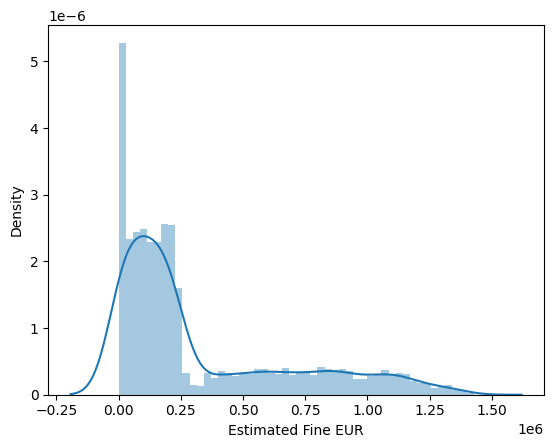

In [90]:
# plot the distribution using displot
sns.distplot(df['Estimated Fine EUR'], bins=50)
plt.show()


In [91]:
df_fines = df[['Estimated Fine EUR']].copy()

df_fines = df_fines.sort_values(
    by='Estimated Fine EUR',
    ascending=False
).reset_index(drop=True)


In [92]:
df_fines['Cumulative Fine'] = df_fines['Estimated Fine EUR'].cumsum()

total_fine = df_fines['Estimated Fine EUR'].sum()

df_fines['Cumulative Fine Share'] = df_fines['Cumulative Fine'] / total_fine


In [93]:
df_fines['Asset Rank'] = df_fines.index + 1
df_fines['Asset Share'] = df_fines['Asset Rank'] / len(df_fines)


In [94]:
top_10_pct_fine_share = (
    df_fines[df_fines['Asset Share'] <= 0.10]
    ['Estimated Fine EUR']
    .sum()
    / total_fine
)

top_10_pct_fine_share


np.float64(0.3474667032837283)

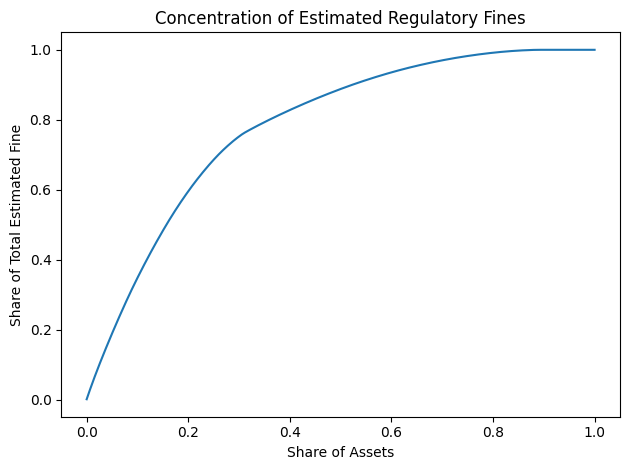

In [95]:
plt.figure()
plt.plot(
    df_fines['Asset Share'],
    df_fines['Cumulative Fine Share']
)

plt.xlabel("Share of Assets")
plt.ylabel("Share of Total Estimated Fine")
plt.title("Concentration of Estimated Regulatory Fines")

plt.tight_layout()
plt.show()

In [96]:
for x in [0.05, 0.20, 0.30]:
    share = (
        df_fines[df_fines['Asset Share'] <= x]['Estimated Fine EUR'].sum()
        / total_fine
    )
    print(f"Top {int(x*100)}% assets → {share:.1%} of total fines")


Top 5% assets → 18.8% of total fines
Top 20% assets → 59.5% of total fines
Top 30% assets → 75.2% of total fines


**High fines x high compliance risk**

In [97]:
def fine_band(x):
    if x >= 1_000_000:
        return 'Very High (€1M+)'
    elif x >= 500_000:
        return 'High (€500k–€1M)'
    elif x >= 100_000:
        return 'Medium (€100k–€500k)'
    else:
        return 'Low (<€100k)'

df['Fine Band'] = df['Estimated Fine EUR'].apply(fine_band)


In [99]:
fine_risk_matrix = (
    df.groupby(['Fine Band', 'Compliance Risk Band'])
      .size()
      .unstack()
      .fillna(0)
)

fine_risk_matrix


Compliance Risk Band,Critical Risk,High Risk,Low Risk,Medium Risk
Fine Band,,,,
High (€500k–€1M),294.0,393.0,16.0,231.0
Low (<€100k),0.0,0.0,1434.0,336.0
Medium (€100k–€500k),79.0,122.0,1401.0,727.0
Very High (€1M+),213.0,199.0,0.0,55.0


In [100]:
fine_risk_pct = (
    fine_risk_matrix
    .div(fine_risk_matrix.sum(axis=1), axis=0)
    * 100
)

fine_risk_pct


Compliance Risk Band,Critical Risk,High Risk,Low Risk,Medium Risk
Fine Band,,,,
High (€500k–€1M),31.477516,42.077088,1.713062,24.732334
Low (<€100k),0.000000,0.000000,81.016949,18.983051
Medium (€100k–€500k),3.392014,5.238300,60.154573,31.215114
Very High (€1M+),45.610278,42.612420,0.000000,11.777302


In [101]:
high_fine_high_risk_pct = (
    fine_risk_pct.loc['High (€500k–€1M)', ['High Risk', 'Critical Risk']].sum()
)

very_high_fine_high_risk_pct = (
    fine_risk_pct.loc['Very High (€1M+)', ['High Risk', 'Critical Risk']].sum()
)

high_fine_high_risk_pct, very_high_fine_high_risk_pct


(np.float64(73.55460385438973), np.float64(88.22269807280514))

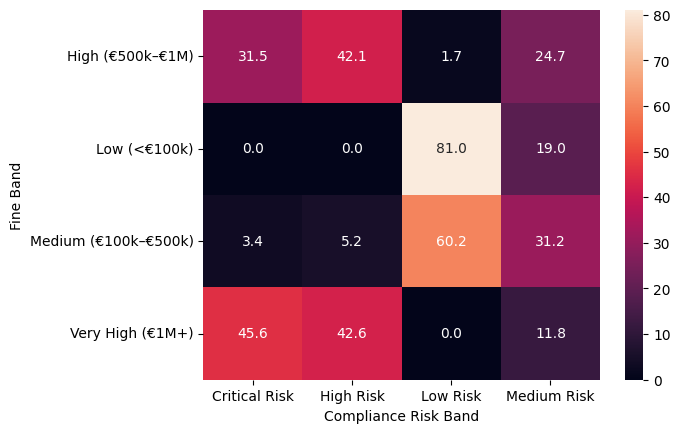

In [102]:
# plot a heatmap of fine_risk_pct
sns.heatmap(fine_risk_pct, annot=True, fmt='.1f')
plt.show()

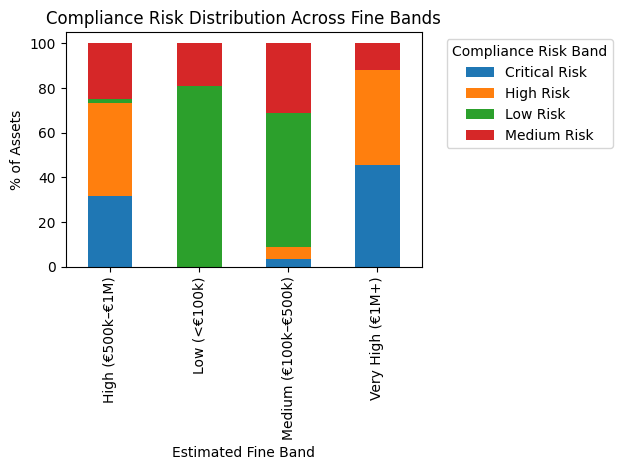

In [105]:
# plot a stacked bar chart of fine_risk_pct
fine_risk_pct.plot(
    kind='bar',
    stacked=True
)

plt.xlabel("Estimated Fine Band")
plt.ylabel("% of Assets")
plt.title("Compliance Risk Distribution Across Fine Bands")
plt.legend(
    title="Compliance Risk Band",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

**high Fines x High Business Impact**

In [106]:
fine_impact_counts = (
    df.groupby(['Fine Band', 'Impact band'])
      .size()
      .unstack()
      .fillna(0)
)


In [107]:
fine_impact_pct = (
    fine_impact_counts
    .div(fine_impact_counts.sum(axis=1), axis=0)
    * 100
)


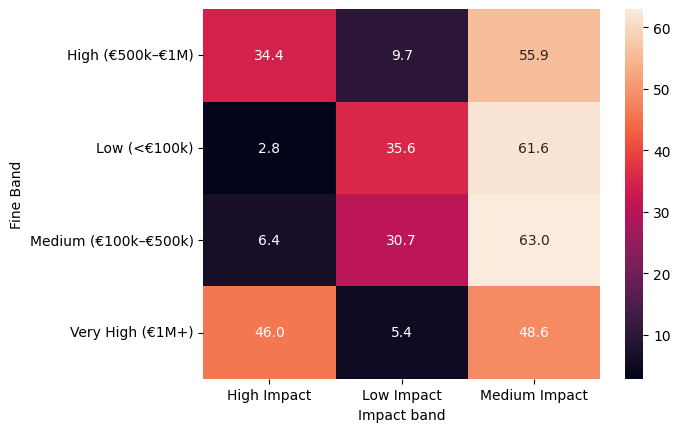

In [108]:
# plot the heatmap fim_impact_pct
sns.heatmap(fine_impact_pct, annot=True, fmt='.1f')
plt.show()

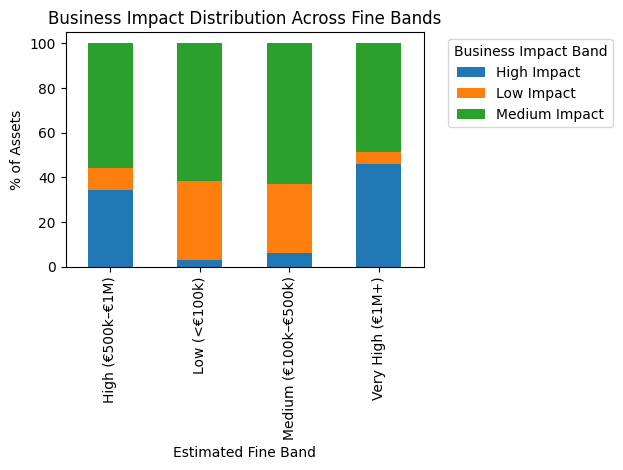

In [109]:
fine_impact_pct.plot(
    kind='bar',
    stacked=True
)

plt.xlabel("Estimated Fine Band")
plt.ylabel("% of Assets")
plt.title("Business Impact Distribution Across Fine Bands")
plt.legend(
    title="Business Impact Band",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


##### The Triple Intersection

**If leadership can only fix a small number of data assets which ones must be fixed first?**


In [110]:
df['High Compliance Risk Flag'] = df['Compliance Risk Score'] >= 75
df['High Business Impact Flag'] = df['Business Impact Score'] >= 7
df['High Fine Flag'] = df['Estimated Fine EUR'] >= 500_000


In [111]:
df['CRITICAL PRIORITY ASSET'] = (
    df['High Compliance Risk Flag'] &
    df['High Business Impact Flag'] &
    df['High Fine Flag']
)

In [112]:
df['CRITICAL PRIORITY ASSET'].value_counts(normalize=True) * 100

CRITICAL PRIORITY ASSET
False    88.218182
True     11.781818
Name: proportion, dtype: float64

In [113]:
priority_assets = (
    df[df['CRITICAL PRIORITY ASSET']]
    .sort_values(
        by=['Estimated Fine EUR', 'Compliance Risk Score', 'Business Impact Score'],
        ascending=False
    )
)


In [114]:
priority_assets[[
    'Business Domain',
    'Source System',
    'Table Name',
    'Field Name',
    'Compliance Risk Score',
    'Business Impact Score',
    'Estimated Fine EUR',
    'Data Owner',
    'Data Steward'
]].head(15)


,Business Domain,Source System,Table Name,Field Name,Compliance Risk Score,Business Impact Score,Estimated Fine EUR,Data Owner,Data Steward
223,IT,IAM,AI_Models,Bias_Test_Score,100.0,9,1426870,CISO,Platform Engineering
3610,HR,Payroll,Recruitment,Phone,100.0,9,1409960,HR Manager,People Ops
1427,HR,Payroll,Employees,National_ID,100.0,9,1407636,HR Director,Data Gov Team
727,Marketing,Email_Platform,Customer_Master,Phone,100.0,10,1404750,Digital Lead,Marketing Analytics
234,HR,HR_System,Employees,Date_of_Birth,100.0,10,1399998,People Ops Lead,HR Analytics
2668,Sales,CRM,Leads,Phone,97.9,10,1396054,Head of Revenue Ops,Data Gov Team
5169,Marketing,Email_Platform,Customer_Master,Email,100.0,7,1381150,Head of Growth,Data Gov Team
2442,HR,Payroll,Employees,Phone,100.0,8,1380205,People Ops Lead,Data Gov Team
3831,Finance,Payments_Gateway,Invoices,IBAN,100.0,8,1379499,Finance Director,Finance Ops
4498,HR,Data_Warehouse,Employees,Last_Name,95.2,8,1377843,HR Manager,People Ops


### Estimated Fine EUR — Financial Exposure & Priority Analysis

#### 1. Purpose of the Feature

Estimated Fine EUR represents the potential regulatory or compliance penalty associated with each governed data asset. This metric quantifies financial exposure and enables prioritization beyond abstract risk or quality scores.

The objective of this analysis is to:
- Understand how fines are distributed across assets
- Identify concentration of financial exposure
- Test alignment between fines, compliance risk, and business impact
- Isolate critical priority assets requiring immediate remediation

#### 2. Distribution & Skewness

The Estimated Fine EUR distribution is highly right-skewed, with a small number of assets carrying disproportionately large potential penalties.

##### Summary Statistics

- **Mean:** ~€323k
- **Median:** ~€175k
- **Max:** ~€1.43M

This confirms that:
- Raw values are unsuitable for direct visualization
- Banding is required for interpretability
- (Log transformation was used only for analysis, not for dashboard visuals.)

#### 3. Fine Concentration (Pareto Analysis)

We evaluated cumulative fine contribution by asset share:

- **Top 5% assets** → 18.8% of total fines
- **Top 20% assets** → 59.5% of total fines
- **Top 30% assets** → 75.2% of total fines

#### Interpretation

Financial exposure is meaningfully concentrated but not isolated to a handful of assets, indicating the need for both targeted and systemic governance actions.

#### 4. Fine Banding Strategy

For interpretability and executive reporting, fines were grouped into four bands:

- **Low:** < €100k
- **Medium:** €100k–€500k
- **High:** €500k–€1M
- **Very High:** €1M+

All downstream analysis uses these bands.

#### 5. Fine × Compliance Risk Alignment

A stacked distribution analysis showed:
- High and Very High fines are dominated by High and Critical Compliance Risk
- Low fine bands are overwhelmingly Low Risk

##### Validation

Compliance Risk scoring is aligned with financial exposure.

#### 6. Fine × Business Impact Alignment

A similar analysis across Business Impact bands showed:
- Very High (€1M+) fines disproportionately affect High Impact assets
- Low fine bands are dominated by Medium/Low impact

##### Validation

The most expensive regulatory penalties also threaten business-critical data assets.

#### 7. Triple Intersection: Critical Priority Assets

A CRITICAL PRIORITY ASSET flag was defined as:
- High / Critical Compliance Risk
- High Business Impact (≥7)
- High or Very High Fine (≥€500k)

##### Result

11.78% of assets meet all three conditions.

These assets represent the highest compounded regulatory, operational, and financial risk.

#### 8. Priority Asset Output

The final output is a ranked list of assets including:
- Business Domain
- Source System
- Table & Field
- Compliance Risk Score
- Business Impact Score
- Estimated Fine EUR
- Data Owner & Steward

This table serves as the actionable remediation list.

#### 9. Conclusion

Estimated Fine EUR completes the governance story by translating abstract risk into tangible financial consequences. Combined with compliance risk and business impact, it enables defensible, cost-effective prioritization.

#### Remediation Cost EUR 

**Remediation Cost EUR estimates the cost to fix the governance issue for a given data asset**

In [115]:
df['Remediation Cost EUR'].describe()

count      5500.000000
mean      50340.084364
std       74729.957241
min         201.000000
25%        4296.250000
50%       10870.000000
75%       81733.000000
max      338390.000000
Name: Remediation Cost EUR, dtype: float64

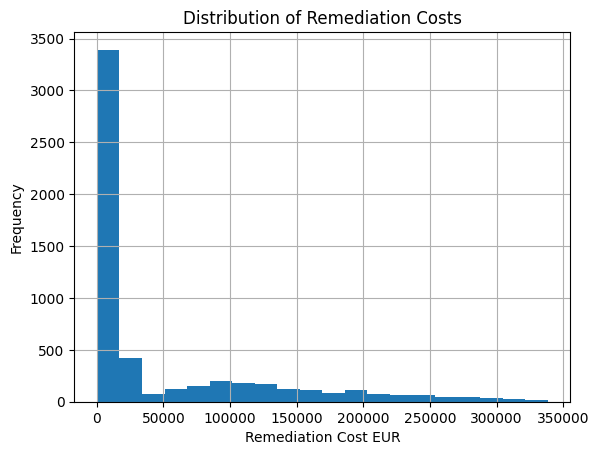

In [117]:
# plot the distribution
df['Remediation Cost EUR'].hist(bins=20)
plt.xlabel("Remediation Cost EUR")
plt.ylabel("Frequency")
plt.title("Distribution of Remediation Costs")
plt.show()

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\4119400808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Remediation Cost EUR'])


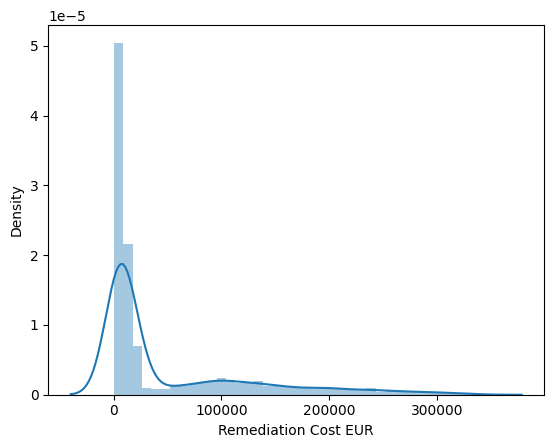

In [118]:
sns.distplot(df['Remediation Cost EUR'])
plt.show()

In [119]:
df['Remediation Cost Band'] = pd.cut(
    df['Remediation Cost EUR'],
    bins=[-1, 10_000, 50_000, 150_000, float('inf')],
    labels=[
        'Low Cost (<€10k)',
        'Medium Cost (€10k–€50k)',
        'High Cost (€50k–€150k)',
        'Very High Cost (>€150k)'
    ]
)


**Remediation cost x Estimated Fine**

In [123]:
fine_remdiation_matrix = (
    df.groupby([
        'Fine Band',
        'Remediation Cost Band'
    ])
    .size()
    .unstack()
    .fillna(0)
)
fine_remediation_pct = (
    fine_remdiation_matrix
    .div(fine_remdiation_matrix.sum(axis=1), axis=0)
    * 100
)

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\4141257769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([


##### What this heatmap is actually answering

**Where does remediation effort sit relative to potential financial loss?**

In [124]:
easy_win_pct = (
    fine_remediation_pct.loc[
        ['High (€500k–€1M)', 'Very High (€1M+)'],
        ['Low Cost (<€10k)', 'Medium Cost (€10k–€50k)']
    ].sum(axis=1)
)

easy_win_pct


Fine Band
High (€500k–€1M)    0.963597
Very High (€1M+)    0.000000
dtype: float64

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\1319882355.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Fine Band', 'Remediation Cost Band'])


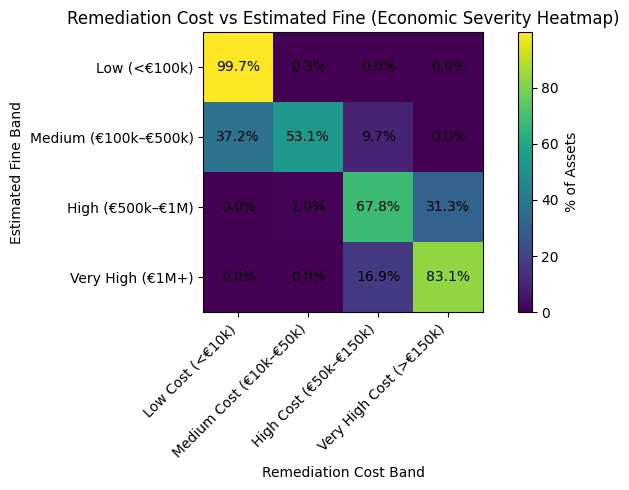

In [125]:
# Fine bands
df['Fine Band'] = pd.cut(
    df['Estimated Fine EUR'],
    bins=[-1, 100_000, 500_000, 1_000_000, float('inf')],
    labels=[
        'Low (<€100k)',
        'Medium (€100k–€500k)',
        'High (€500k–€1M)',
        'Very High (€1M+)'
    ]
)

# Remediation bands
df['Remediation Cost Band'] = pd.cut(
    df['Remediation Cost EUR'],
    bins=[-1, 10_000, 50_000, 150_000, float('inf')],
    labels=[
        'Low Cost (<€10k)',
        'Medium Cost (€10k–€50k)',
        'High Cost (€50k–€150k)',
        'Very High Cost (>€150k)'
    ]
)

# Heatmap matrix
heatmap_matrix = (
    df.groupby(['Fine Band', 'Remediation Cost Band'])
      .size()
      .unstack()
      .fillna(0)
)

heatmap_pct = heatmap_matrix.div(
    heatmap_matrix.sum(axis=1), axis=0
) * 100

# Plot
plt.figure(figsize=(8, 5))
plt.imshow(heatmap_pct.values)

plt.xticks(
    range(len(heatmap_pct.columns)),
    heatmap_pct.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(heatmap_pct.index)),
    heatmap_pct.index
)

plt.colorbar(label="% of Assets")
plt.title("Remediation Cost vs Estimated Fine (Economic Severity Heatmap)")
plt.xlabel("Remediation Cost Band")
plt.ylabel("Estimated Fine Band")

for i in range(len(heatmap_pct.index)):
    for j in range(len(heatmap_pct.columns)):
        plt.text(
            j, i,
            f"{heatmap_pct.values[i, j]:.1f}%",
            ha="center",
            va="center"
        )

plt.tight_layout()
plt.show()


In [129]:
# Build matrix
risk_remediation_matrix = (
    df.groupby(['Compliance Risk Band', 'Remediation Cost Band'])
      .size()
      .unstack()
      .fillna(0)
)

# Convert to row-wise percentages
risk_remediation_pct = (
    risk_remediation_matrix
    .div(risk_remediation_matrix.sum(axis=1), axis=0)
    * 100
)


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\3926367803.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Compliance Risk Band', 'Remediation Cost Band'])


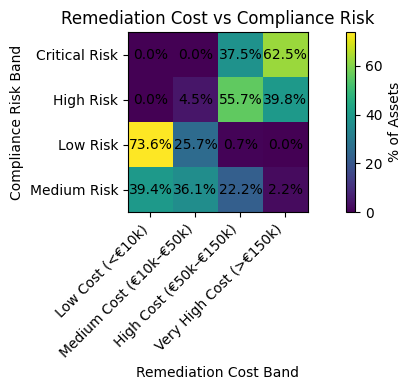

In [130]:
plt.figure(figsize=(8, 4))
plt.imshow(risk_remediation_pct.values)

plt.xticks(
    range(len(risk_remediation_pct.columns)),
    risk_remediation_pct.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(risk_remediation_pct.index)),
    risk_remediation_pct.index
)

plt.colorbar(label="% of Assets")
plt.title("Remediation Cost vs Compliance Risk")
plt.xlabel("Remediation Cost Band")
plt.ylabel("Compliance Risk Band")

for i in range(len(risk_remediation_pct.index)):
    for j in range(len(risk_remediation_pct.columns)):
        plt.text(
            j, i,
            f"{risk_remediation_pct.values[i, j]:.1f}%",
            ha="center",
            va="center"
        )

plt.tight_layout()
plt.show()


#### 4️⃣ ROI Lens — Fine-to-Remediation Ratio

##### What This Metric Really Is (Internalize This)

You are computing:

$$\textbf{ROI Ratio} = \frac{\text{Estimated Fine EUR}}{\text{Remediation Cost EUR}}$$

##### Interpretation

- **ROI = 10** → €1 spent avoids €10 of exposure
- **ROI = 50** → €1 spent avoids €50
- **ROI = 100** → €1 spent avoids €100

This is not a score. This is a capital efficiency metric.

Executives understand this instantly.

In [131]:
# Create the ratio
df['Fine_to_Remediation_Ratio'] = (
    df['Estimated Fine EUR'] / df['Remediation Cost EUR']
)

# Remove infinite / extreme noise if needed
df = df.replace([float('inf'), -float('inf')], None)


In [132]:
df['Fine_to_Remediation_Ratio'].describe()


count    5500.000000
mean       11.382558
std         7.593848
min         0.000000
25%         5.000013
50%        10.000185
75%        16.666387
max        25.019573
Name: Fine_to_Remediation_Ratio, dtype: float64

In [133]:
def roi_band(x):
    if x >= 50:
        return 'Extreme ROI (≥50x)'
    elif x >= 10:
        return 'High ROI (10–50x)'
    elif x >= 3:
        return 'Moderate ROI (3–10x)'
    else:
        return 'Low ROI (<3x)'

df['ROI Band'] = df['Fine_to_Remediation_Ratio'].apply(roi_band)


In [134]:
roi_priority_dist = (
    df[df['CRITICAL PRIORITY ASSET']]
    ['ROI Band']
    .value_counts(normalize=True) * 100
)

roi_priority_dist


ROI Band
Moderate ROI (3–10x)    99.845679
High ROI (10–50x)        0.154321
Name: proportion, dtype: float64

In [135]:
roi_ranked_assets = (
    df.sort_values(
        by='Fine_to_Remediation_Ratio',
        ascending=False
    )
)

roi_ranked_assets[[
    'Business Domain',
    'Source System',
    'Table Name',
    'Field Name',
    'Compliance Risk Score',
    'Business Impact Score',
    'Estimated Fine EUR',
    'Remediation Cost EUR',
    'Fine_to_Remediation_Ratio',
    'ROI Band',
    'Data Owner',
    'Data Steward'
]].head(15)


,Business Domain,Source System,Table Name,Field Name,Compliance Risk Score,Business Impact Score,Estimated Fine EUR,Remediation Cost EUR,Fine_to_Remediation_Ratio,ROI Band,Data Owner,Data Steward
1977,IT,AI_Platform,Access_Logs,Resource,31.0,1,14061,562,25.019573,High ROI (10–50x),Head of Data Platform,Platform Engineering
4969,Operations,Procurement,Support_Tickets,Ticket_ID,25.8,5,12884,515,25.017476,High ROI (10–50x),Head of Operations,Process Excellence
2106,Marketing,Web_Analytics,Campaigns,UTM_Campaign,29.4,7,15961,638,25.017241,High ROI (10–50x),Marketing Lead,Marketing Analytics
1865,Operations,Data_Warehouse,Support_Tickets,Priority,47.5,8,16811,672,25.016369,High ROI (10–50x),Head of Operations,Ops BI
3884,Operations,Data_Warehouse,Support_Tickets,Ticket_ID,24.5,3,21037,841,25.014269,High ROI (10–50x),Ops Director,Process Excellence
1866,Operations,Procurement,Support_Tickets,Created_Date,19.2,5,16859,674,25.013353,High ROI (10–50x),Supply Chain Lead,Data Gov Team
419,Finance,Data_Warehouse,Invoices,Tax_Amount_EUR,24.4,4,22211,888,25.012387,High ROI (10–50x),Controller,Finance Ops
4310,Operations,Support,Support_Tickets,Resolution_Time_Min,22.7,5,23986,959,25.011470,High ROI (10–50x),Head of Operations,Data Gov Team
4060,Marketing,Web_Analytics,Sessions,Customer_ID,22.6,4,18808,752,25.010638,High ROI (10–50x),Digital Lead,Data Gov Team
5267,Sales,POS,POS_Transactions,Txn_ID,3.1,2,23585,943,25.010604,High ROI (10–50x),Sales Director,Sales Analytics


### Feature: Remediation Cost EUR

#### 1. Feature Overview

Remediation Cost EUR represents the estimated cost required to fix, correct, or mitigate a data governance issue for a given data asset.

This includes:
- Process fixes
- Data cleansing
- Access control changes
- Masking or encryption
- System or pipeline modifications

This feature is not a quality metric — it is a cost lever.

#### 2. Basic Distribution Check

| Metric | Value |
|--------|-------|
| Count | 5,500 |
| Mean | €50,340 |
| Median | €10,870 |
| Std Dev | €74,730 |
| Min | €201 |
| 75th Percentile | €81,733 |
| Max | €338,390 |

##### Observations

- Strong right skew
- Most fixes are cheap
- A small tail of very expensive remediations

This justifies banding instead of raw values for dashboard usage.

#### 3. Remediation Cost Banding

- **Low Cost:** < €10k
- **Medium Cost:** €10k–€50k
- **High Cost:** €50k–€150k
- **Very High Cost:** > €150k

##### Purpose

- Enable categorical comparisons
- Align with executive cost thinking
- Avoid misleading averages

#### 4. Remediation Cost × Estimated Fine

##### Economic Severity Relationship

**Visualization:** Heatmap
- Y-axis: Estimated Fine Band
- X-axis: Remediation Cost Band
- Value: % of assets (row-normalized)

##### Key Findings

- Low fines overwhelmingly map to low remediation cost
- High and very high fines mostly require high or very high remediation
- Minimal economic mismatch (no "cheap fix for massive fine" pattern)

This validates internal consistency of the dataset.

#### 5. Remediation Cost × Compliance Risk

**Visualization:** Heatmap
- Y-axis: Compliance Risk Band
- X-axis: Remediation Cost Band
- Value: % of assets

##### Findings

- Critical Risk → predominantly high / very high remediation cost
- Low Risk → overwhelmingly low / medium remediation cost

##### Interpretation

High risk is genuinely expensive to fix — not an analytical artifact.

#### 6. Fine-to-Remediation Ratio (ROI Lens)

##### Definition

$$\text{Fine-to-Remediation Ratio} = \frac{\text{Estimated Fine EUR}}{\text{Remediation Cost EUR}}$$

This metric estimates economic efficiency of remediation.

#### 7. ROI Distribution

| Metric | Value |
|--------|-------|
| Mean | ≈ 11.38x |
| Median | ≈ 10x |
| Max | ≈ 25x |

##### ROI Banding

- **Moderate ROI:** 3–10x
- **High ROI:** 10–50x

| Band | % of Assets |
|------|-------------|
| Moderate ROI | 99.85% |
| High ROI | 0.15% |

#### 8. High ROI Asset Review

##### High ROI Cases

- Low remediation cost
- Low to medium compliance risk
- Operational / analytics fields
- Not compliance-critical

These are operational hygiene wins, not regulatory priorities.

#### 9. Notebook Conclusion

- Remediation cost scales rationally with fine severity and compliance risk
- Governance investment is economically aligned
- ROI is strong but predictable
- Prioritization should focus on severity alignment, not ROI hunting

#### Bucket 6: Time and Audit Freshness

**audit date**

In [137]:
df['Audit Date'].describe()

count           5500
unique           731
top       2024-06-10
freq              17
Name: Audit Date, dtype: object

In [139]:
df['Audit Date'] = pd.to_datetime(df['Audit Date'], errors='coerce')


In [140]:
# plot the line chart
df['Audit Month'] = df['Audit Date'].dt.to_period('M')
monthly_audits = df.groupby('Audit Month').size()

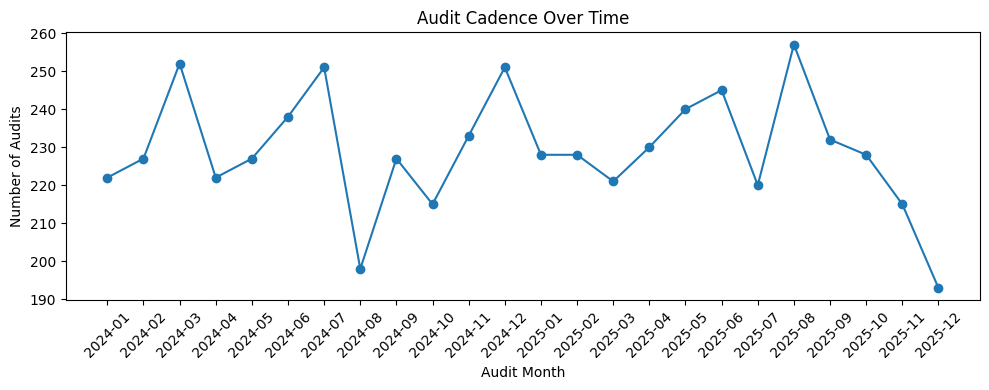

In [141]:
plt.figure(figsize=(10, 4))
plt.plot(
    monthly_audits.index.astype(str),
    monthly_audits.values,
    marker='o'
)

plt.xlabel("Audit Month")
plt.ylabel("Number of Audits")
plt.title("Audit Cadence Over Time")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature: Audit Date (Audit Cadence Validation)

#### Purpose of Analysis

`Audit Date` is not analyzed for trends or performance. It is used only to validate audit coverage consistency over time.

#### Transformation Performed

- Converted `Audit Date` to datetime
- Aggregated audits by calendar month (`Audit Month`)

#### Visualization

**Line Chart: Audit Cadence Over Time**
- X-axis: Audit Month
- Y-axis: Number of audits
- No smoothing, no trendline

#### Observations

- Audits are consistently distributed across months
- Monthly audit counts remain within a stable range
- No extended gaps or extreme clustering detected

#### Conclusion

The organization demonstrates continuous audit activity rather than reactive or batch-driven auditing. This chart is used only as a sanity check and not as a decision-making input.

#### Note

This visualization is EDA-only and is not included in the Power BI dashboard.

**Days Since Last Audit**

In [142]:
df['Days Since Last Audit'].describe()

count    5500.000000
mean      372.096727
std       209.158857
min         5.000000
25%       192.000000
50%       371.000000
75%       555.000000
max       735.000000
Name: Days Since Last Audit, dtype: float64

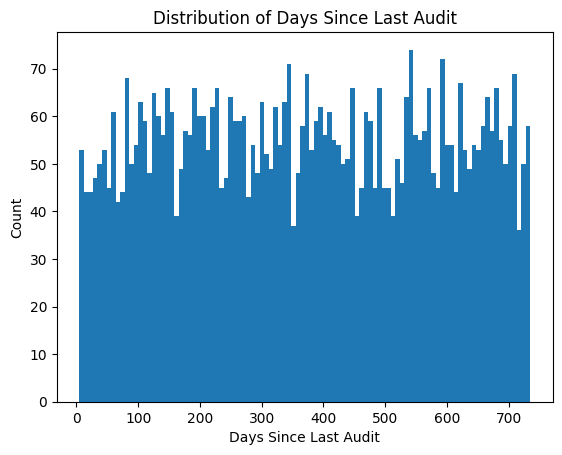

In [145]:
# plot days since last audit histogram
plt.hist(df['Days Since Last Audit'], bins=100)
plt.xlabel('Days Since Last Audit')
plt.ylabel('Count')
plt.title('Distribution of Days Since Last Audit')
plt.show()

In [146]:
df['Audit Freshness Band'] = pd.cut(
    df['Days Since Last Audit'],
    bins=[-1, 180, 365, 540, float('inf')],
    labels=['Fresh', 'Aging', 'Stale', 'Critical']
)

In [147]:
df['Audit Freshness Band'].value_counts(normalize=True) * 100


Audit Freshness Band
Critical    27.218182
Aging       25.909091
Stale       23.636364
Fresh       23.236364
Name: proportion, dtype: float64

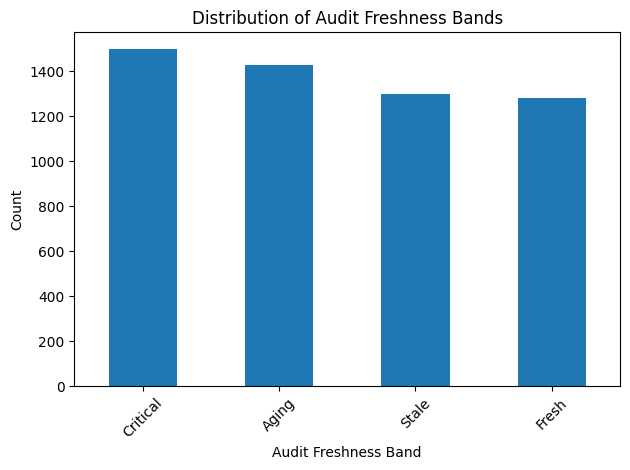

In [148]:
# plot the Audit Freshness Band
df['Audit Freshness Band'].value_counts().plot(kind='bar')
plt.xlabel('Audit Freshness Band')
plt.ylabel('Count')
plt.title('Distribution of Audit Freshness Bands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Compliance Risk vs Audit Freshness**

In [149]:
risk_freshness = (
    df
    .groupby(['Compliance Risk Band', 'Audit Freshness Band'])
    .size()
    .unstack(fill_value=0)
)

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\2434915410.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Compliance Risk Band', 'Audit Freshness Band'])


In [150]:
risk_freshness_pct = risk_freshness.div(
    risk_freshness.sum(axis=1),
    axis=0
) * 100


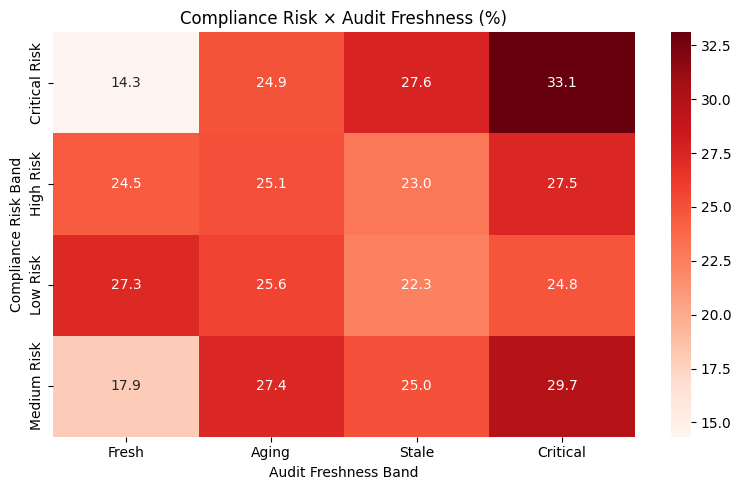

In [151]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    risk_freshness_pct,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("Compliance Risk × Audit Freshness (%)")
plt.xlabel("Audit Freshness Band")
plt.ylabel("Compliance Risk Band")
plt.tight_layout()
plt.show()

**Business Impact x Audit Freshness**

In [154]:
impact_freshness = (
    df
    .groupby(['Impact band', 'Audit Freshness Band'])
    .size()
    .unstack(fill_value=0)
)

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\1083135693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Impact band', 'Audit Freshness Band'])


In [155]:
impact_freshness_pct = impact_freshness.div(
    impact_freshness.sum(axis=1),
    axis=0
) * 100


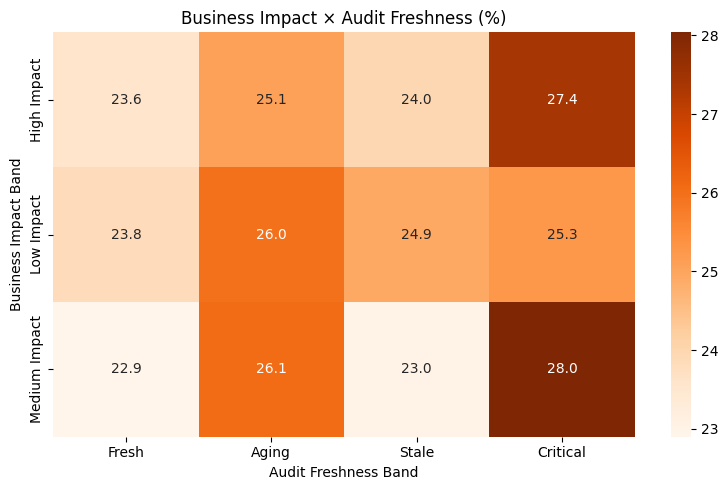

In [156]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    impact_freshness_pct,
    annot=True,
    fmt=".1f",
    cmap="Oranges"
)
plt.title("Business Impact × Audit Freshness (%)")
plt.xlabel("Audit Freshness Band")
plt.ylabel("Business Impact Band")
plt.tight_layout()
plt.show()


**Critical Priority Assets x Audit Freshness**

In [158]:
critical_assets = df[df['CRITICAL PRIORITY ASSET'] == True]


In [159]:
critical_freshness = (
    critical_assets['Audit Freshness Band']
    .value_counts(normalize=True)
    * 100
)

In [160]:
band_order = ['Fresh', 'Aging', 'Stale', 'Critical']
critical_freshness = critical_freshness.reindex(band_order)

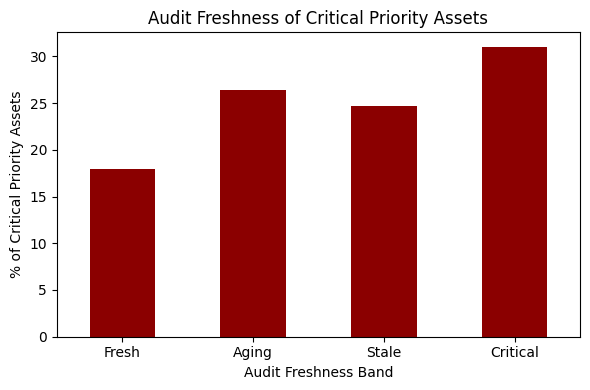

In [161]:
plt.figure(figsize=(6, 4))
critical_freshness.plot(kind='bar', color='darkred')
plt.ylabel("% of Critical Priority Assets")
plt.title("Audit Freshness of Critical Priority Assets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Feature: Days Since Last Audit (Audit Freshness)

#### Objective

Assess audit freshness across data assets to understand governance visibility gaps and time-based risk exposure.

This feature answers:
- How recently assets have been audited
- Whether high-risk / high-impact assets are being reviewed frequently enough
- Where governance blind spots exist due to stale audits

#### Step 1: Raw Distribution (Exploratory Only)

We first examined the raw distribution of `Days Since Last Audit` to understand scale and spread.

##### Summary Statistics

- Range spans from very recent audits to assets untouched for 700+ days
- Distribution is wide and flat → raw days are not decision-friendly

📌 **Insight:** Raw day values are useful for exploration but cannot be used directly in dashboards or governance decisions.

#### Step 2: Audit Freshness Banding (Core Transformation)

To convert time into actionable governance signals, we created policy-aligned audit freshness bands.

| Audit Freshness Band | Days Since Last Audit | Interpretation |
|---|---|---|
| Fresh | ≤ 180 days | High governance confidence |
| Aging | 181–365 days | Review needed soon |
| Stale | 366–540 days | Risk accumulating |
| Critical | > 540 days | Governance blind spot |

This transformation enables:
- Comparability
- Prioritization
- Dashboard-ready metrics

#### Step 3: Distribution Across Freshness Bands

We computed the proportion of assets in each freshness band.

##### Result

- Assets are relatively evenly spread
- ~27% of assets fall into the Critical freshness category

📌 **Insight:** A significant portion of assets have not been audited for over 18 months, indicating systemic audit backlog.

#### Step 4: Compliance Risk × Audit Freshness

We analyzed how audit freshness aligns with compliance risk bands.

##### Visualization

Heatmap showing % distribution of assets across:
- Compliance Risk Band
- Audit Freshness Band

📌 **Key Finding:**
- Critical compliance risk assets are disproportionately represented in Stale and Critical audit bands
- High-risk assets are not being audited frequently enough

#### Step 5: Business Impact × Audit Freshness

We repeated the analysis for business impact.

📌 **Key Finding:**
- High business impact assets increasingly fall into Critical audit freshness
- Time-based neglect directly affects business-critical data

#### Step 6: Critical Priority Assets × Audit Freshness (Action Lens)

Finally, we isolated Critical Priority Assets (High Risk × High Impact × High Fine).

### Result

The highest concentration of critical assets appears in:
- Aging
- Stale
- Critical audit bands

📌 **Insight:** These are the first assets that must be audited to reduce exposure.

#### Conclusion (Notebook)

- Raw time → transformed into governance signals
- Audit freshness is a leading indicator of risk
- Time-based neglect compounds compliance and business exposure

**Audit Findings Count**

In [162]:
df['Audit Findings Count'].describe()

count    5500.000000
mean        4.599636
std         3.802747
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        15.000000
Name: Audit Findings Count, dtype: float64

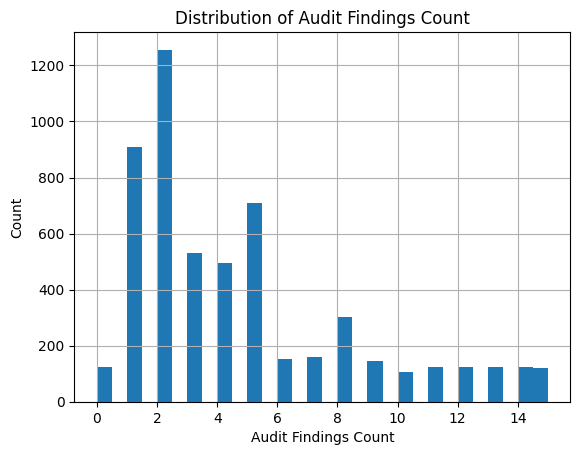

In [165]:
# plot the distribution
df['Audit Findings Count'].hist(bins=30)
plt.xlabel('Audit Findings Count')
plt.ylabel('Count')
plt.title('Distribution of Audit Findings Count')
plt.show()

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\1724349286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Audit Findings Count'])


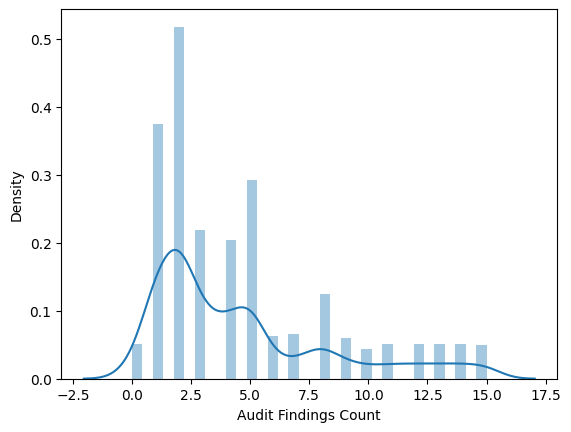

In [166]:
sns.distplot(df['Audit Findings Count'])
plt.show()

In [167]:
def findings_band(x):
    if x <= 1:
        return "Clean"
    elif x <= 3:
        return "Minor Issues"
    elif x <= 6:
        return "Moderate Issues"
    else:
        return "Severe Issues"

df["Findings Severity Band"] = df["Audit Findings Count"].apply(findings_band)


##### Plot distribution of Findings Severity Bands

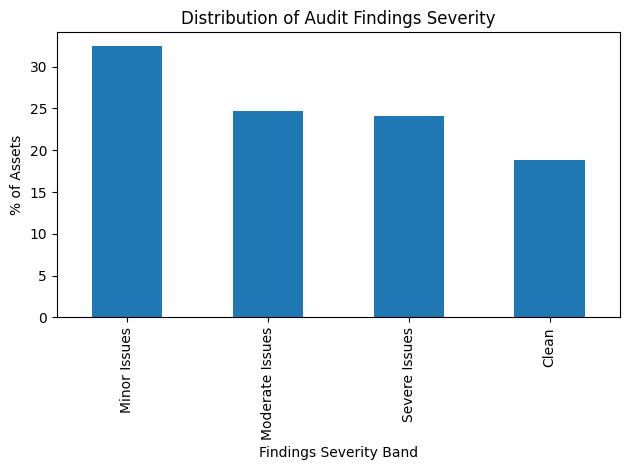

In [168]:
band_dist = df["Findings Severity Band"].value_counts(normalize=True) * 100

band_dist.plot(kind="bar")
plt.ylabel("% of Assets")
plt.title("Distribution of Audit Findings Severity")
plt.tight_layout()
plt.show()


**Compliance Risk × Findings Severity**

In [171]:
risk_order = ["Low Risk", "Medium Risk", "High Risk", "Critical Risk"]
findings_order = ["Clean", "Minor Issues", "Moderate Issues", "Severe Issues"]


In [173]:
risk_findings = (
    df
    .groupby(["Compliance Risk Band", "Findings Severity Band"])
    .size()
    .unstack()   # <-- CRITICAL
    .reindex(
        index=risk_order,
        columns=findings_order,
        fill_value=0
    )
)




In [174]:
risk_findings_pct = (
    risk_findings
    .div(risk_findings.sum(axis=1), axis=0)
    * 100
)

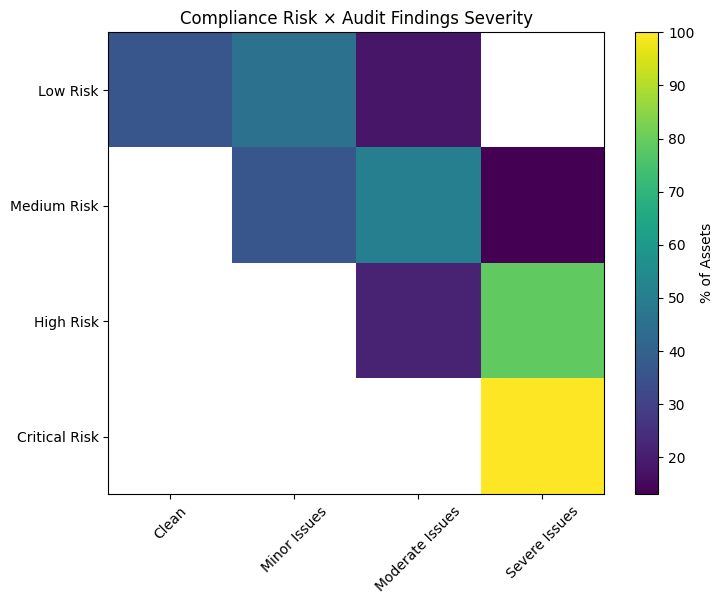

In [178]:
masked = risk_findings_pct.replace(0, np.nan)

plt.figure(figsize=(8,6))
plt.imshow(masked, aspect="auto")

plt.xticks(
    range(len(findings_order)),
    findings_order,
    rotation=45
)
plt.yticks(
    range(len(risk_order)),
    risk_order
)

plt.colorbar(label="% of Assets")
plt.title("Compliance Risk × Audit Findings Severity")
plt.show()



**Audit Freshness x Findings Severity**

In [179]:
freshness_findings = (
    df.groupby(["Audit Freshness Band", "Findings Severity Band"])
      .size()
      .unstack()
)

freshness_findings_pct = (
    freshness_findings
    .div(freshness_findings.sum(axis=1), axis=0) * 100
)


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\69144228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Audit Freshness Band", "Findings Severity Band"])


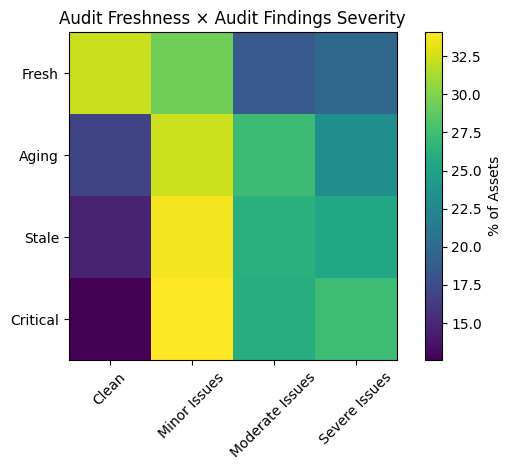

In [180]:
plt.figure()
plt.imshow(freshness_findings_pct.values)
plt.xticks(range(len(freshness_findings_pct.columns)), freshness_findings_pct.columns, rotation=45)
plt.yticks(range(len(freshness_findings_pct.index)), freshness_findings_pct.index)
plt.colorbar(label="% of Assets")
plt.title("Audit Freshness × Audit Findings Severity")
plt.tight_layout()
plt.show()


### Audit Findings Count — Analysis Summary

#### Feature Description

Audit Findings Count represents the number of governance, quality, or compliance issues identified during the most recent audit of a data asset. Higher values indicate weaker governance controls at the time of audit.

This feature is diagnostic, not a KPI.

#### 1. Raw Distribution

- Distribution is right-skewed
- Majority of assets have 1–5 findings
- Long tail up to 15 findings, indicating systemic failures for a minority of assets

This confirms a realistic audit environment where most assets have minor issues, while a small subset exhibits serious governance breakdowns.

#### 2. Findings Severity Banding

To make findings decision-ready, raw counts were converted into governance-aligned severity bands:

| Severity Band | Findings Count |
|---|---|
| Clean | 0–1 |
| Minor Issues | 2–3 |
| Moderate Issues | 4–6 |
| Severe Issues | ≥7 |

This transformation enables meaningful aggregation and downstream governance decisions.

#### 3. Severity Distribution

- Minor Issues dominate
- Moderate and Severe Issues together form a substantial portion
- Clean assets are a minority

This indicates that while governance exists, control effectiveness is inconsistent across assets.

#### 4. Compliance Risk × Findings Severity

A row-normalized heatmap shows strong alignment between compliance risk and audit findings severity:

- Low Risk assets concentrate in Clean / Minor
- Medium Risk assets shift toward Moderate
- High and Critical Risk assets are dominated by Severe Issues

This validates that compliance risk scoring is audit-backed, not arbitrary.

#### 5. Audit Freshness × Findings Severity

Findings severity worsens as audit freshness degrades:

- Fresh audits show higher proportions of Clean / Minor Issues
- Critical audit freshness shows concentration in Moderate and Severe Issues

This demonstrates governance debt accumulation when audits are delayed.

#### Analytical Role

Audit Findings Count:

- Is not used alone to flag assets
- Acts as a risk multiplier when combined with:
  - Compliance Risk
  - Audit Freshness
  - Business Impact

This feature feeds into Critical Priority Asset identification, but is never visualized as a standalone decision metric.

**Open Issues Count**

Audit Findings Count = what was discovered
Open Issues Count = what is still unresolved

**How much risk do we already know about and have still not fixed?**



In [181]:
df['Open Issues Count'].describe()

count    5500.000000
mean        3.024182
std         3.133851
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: Open Issues Count, dtype: float64

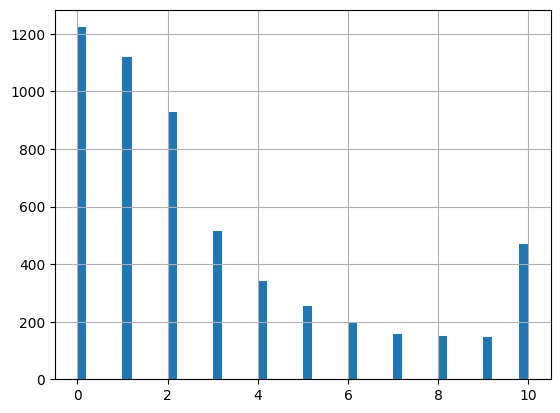

In [182]:
# plot the distribution
df['Open Issues Count'].hist(bins=50)
plt.show()

C:\Users\adith\AppData\Local\Temp\ipykernel_38196\1487054004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open Issues Count'])


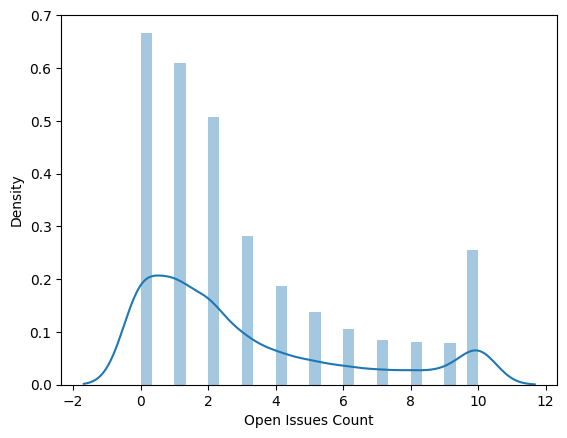

In [183]:
sns.distplot(df['Open Issues Count'])
plt.show()

In [185]:
def open_issues_band(x):
    if x == 0:
        return "Resolved"
    elif x <= 2:
        return "Low"
    elif x <= 5:
        return "Medium"
    elif x <= 9:
        return "High"
    else:
        return "Critical"

df["Open Issues Severity Band"] = df["Open Issues Count"].apply(open_issues_band)


In [187]:
df["Open Issues Severity Band"].value_counts(normalize=True) * 100


Open Issues Severity Band
Low         37.236364
Resolved    22.236364
Medium      20.236364
High        11.763636
Critical     8.527273
Name: proportion, dtype: float64

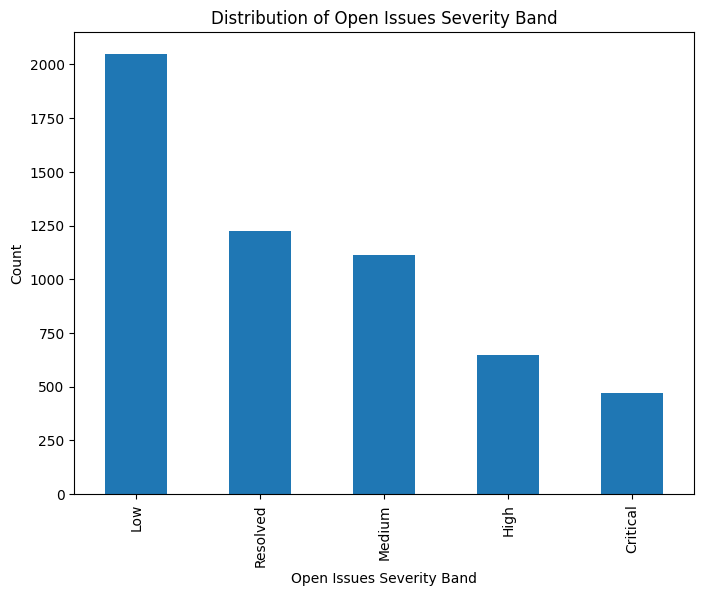

In [196]:
# plot the bar chart of open issues count
plt.figure(figsize=(8, 6))
df['Open Issues Severity Band'].value_counts().plot(kind='bar')
plt.xlabel('Open Issues Severity Band')
plt.ylabel('Count')
plt.title('Distribution of Open Issues Severity Band')
plt.show()

In [186]:
open_issues_order = [
    "Resolved",
    "Low",
    "Medium",
    "High",
    "Critical"
]

df["Open Issues Severity Band"] = pd.Categorical(
    df["Open Issues Severity Band"],
    categories=open_issues_order,
    ordered=True
)


**Compliance Risk × Open Issues**

In [188]:
risk_open = (
    df
    .groupby(["Compliance Risk Band", "Open Issues Severity Band"])
    .size()
    .unstack(fill_value=0)
)

risk_open_pct = (
    risk_open
    .div(risk_open.sum(axis=1), axis=0) * 100
)


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\758290635.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Compliance Risk Band", "Open Issues Severity Band"])


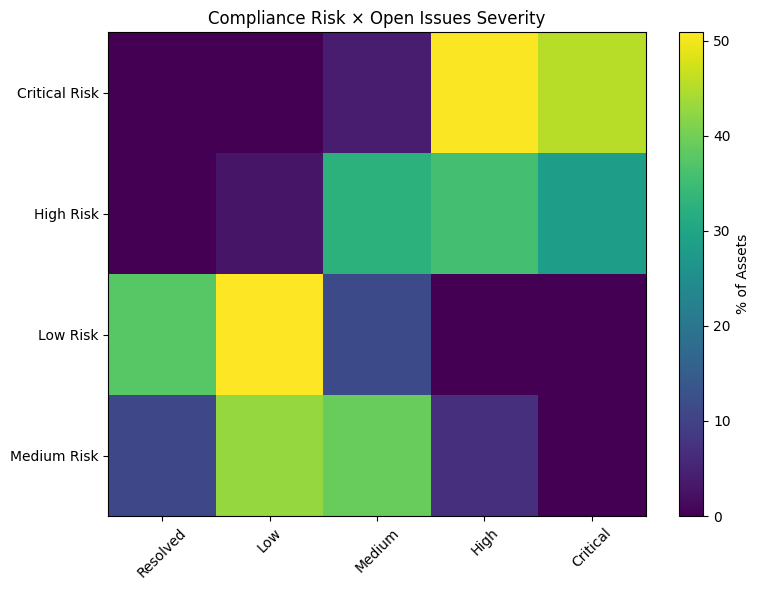

In [189]:
# plot an heatmap
plt.figure(figsize=(8, 6))
plt.imshow(risk_open_pct.values, aspect="auto")
plt.xticks(range(len(risk_open_pct.columns)), risk_open_pct.columns, rotation=45)
plt.yticks(range(len(risk_open_pct.index)), risk_open_pct.index)
plt.colorbar(label="% of Assets")
plt.title("Compliance Risk × Open Issues Severity")
plt.tight_layout()
plt.show()

**Audit Freshness × Open Issues Severity**

In [190]:
fresh_open = (
    df
    .groupby(["Audit Freshness Band", "Open Issues Severity Band"])
    .size()
    .unstack(fill_value=0)
)

fresh_open_pct = (
    fresh_open
    .div(fresh_open.sum(axis=1), axis=0) * 100
)


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\4104815656.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Audit Freshness Band", "Open Issues Severity Band"])


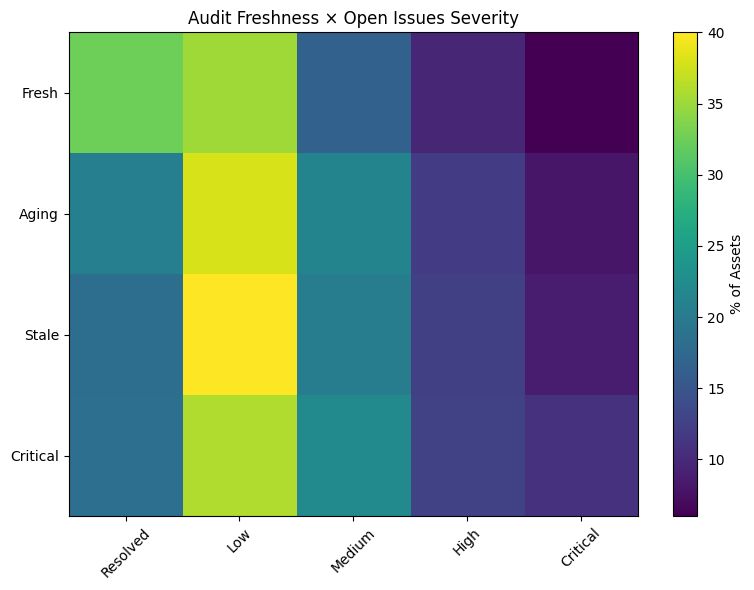

In [191]:
# plot an heatmap
plt.figure(figsize=(8, 6))
plt.imshow(fresh_open_pct.values, aspect="auto")
plt.xticks(range(len(fresh_open_pct.columns)), fresh_open_pct.columns, rotation=45)
plt.yticks(range(len(fresh_open_pct.index)), fresh_open_pct.index)
plt.colorbar(label="% of Assets")
plt.title("Audit Freshness × Open Issues Severity")
plt.tight_layout()
plt.show()

**Business Impact x Open Issues Severity**

In [194]:
impact_open = (
    df
    .groupby(["Impact band", "Open Issues Severity Band"])
    .size()
    .unstack(fill_value=0)
)

impact_open_pct = (
    impact_open
    .div(impact_open.sum(axis=1), axis=0) * 100
)


C:\Users\adith\AppData\Local\Temp\ipykernel_38196\2818729428.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Impact band", "Open Issues Severity Band"])


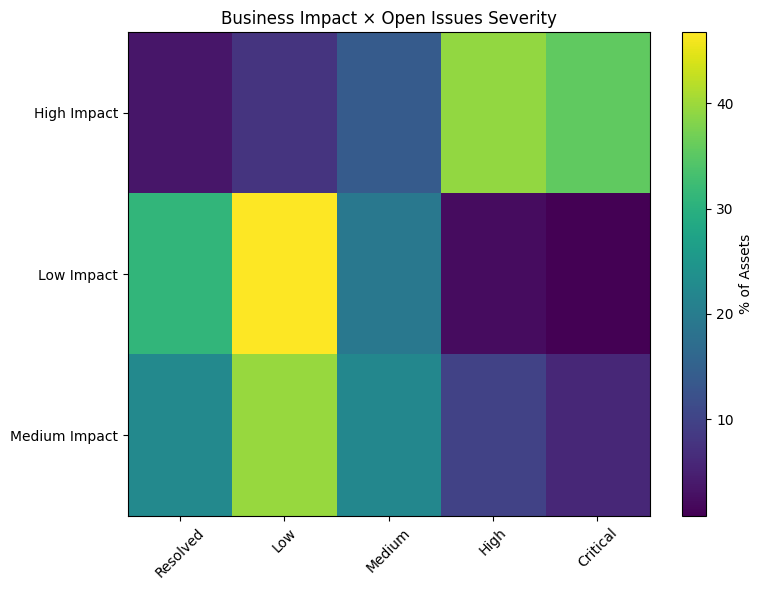

In [195]:
# plot an heatmap
plt.figure(figsize=(8, 6))
plt.imshow(impact_open_pct.values, aspect="auto")
plt.xticks(range(len(impact_open_pct.columns)), impact_open_pct.columns, rotation=45)
plt.yticks(range(len(impact_open_pct.index)), impact_open_pct.index)
plt.colorbar(label="% of Assets")
plt.title("Business Impact × Open Issues Severity")
plt.tight_layout()
plt.show()

### Feature: Open Issues Count

#### What This Feature Represents

Open Issues Count captures the number of unresolved audit findings for a data asset at the time of analysis. It reflects governance execution health, not detection quality.

- **Audit Findings Count** → what was identified
- **Open Issues Count** → what remains unfixed

This makes Open Issues a lagging but critical indicator of governance effectiveness.

#### Step 1: Distribution Analysis

We first inspected the raw distribution of `Open Issues Count`.

##### Observation

- Right-skewed distribution
- Majority of assets have 0–3 open issues
- A long tail exists with assets having ≥10 unresolved issues

This confirms the need for banding, not raw values.

#### Step 2: Open Issues Severity Bands

We created policy-aligned severity bands:

| Band | Definition |
|---|---|
| Resolved | 0 |
| Low | 1–2 |
| Medium | 3–5 |
| High | 6–9 |
| Critical | ≥10 |

These bands convert raw counts into actionable governance states.

#### Step 3: Severity Distribution

Proportion of assets by severity band:

- **Low:** ~37%
- **Resolved:** ~22%
- **Medium:** ~20%
- **High:** ~12%
- **Critical:** ~9%

##### Interpretation

- ~60% of assets are under control (Resolved + Low)
- ~21% sit in a risk accumulation zone (Medium)
- ~20% represent execution failure risk (High + Critical)

#### Step 4: Cross-Tab Analyses

##### 4.1 Compliance Risk × Open Issues Severity

**Purpose:** Validate whether execution aligns with risk prioritization.

**Key Signal:**
- High / Critical Compliance Risk clusters strongly in High / Critical Open Issues
- Low Risk assets mostly appear in Resolved / Low

This confirms risk scoring credibility.

##### 4.2 Audit Freshness × Open Issues Severity

**Purpose:** Distinguish neglect from capacity issues.

**Key Signals:**
- Critical freshness + High open issues → governance abandonment
- Fresh audits + High open issues → remediation capacity bottleneck

##### 4.3 Business Impact × Open Issues Severity

**Purpose:** Surface leadership-level exposure.

**Key Signal:**
- High Business Impact assets show higher concentration in High / Critical Open Issues

This highlights known, important, unfixed risks.

##### Analytical Conclusion 

- Open Issues Count is not a standalone KPI
- It functions as a multiplier signal inside Critical Priority Asset logic
- Further slicing would not add analytical value

This feature is now fully analyzed and ready for decision logic integration.

In [197]:
df.to_csv("governance_risk_dashboard_dataset.csv", index=False)